# Comparison between New York and Toronto Cities to find Similarity and Dissimilarity

## 1- New York City Data:

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
nyc_neighborhoods_data = newyork_data['features']

In [5]:
nyc_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                                  'Neighborhood': neighborhood_name,
                                                  'Latitude': neighborhood_lat,
                                                  'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
nyc_neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [8]:
# make sure that the dataset has all 5 boroughs and 306 neighborhoods
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(nyc_neighborhoods['Borough'].unique()),
        nyc_neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [9]:
nnvc = nyc_neighborhoods['Neighborhood'].value_counts()
nnvc[nnvc > 1]

Murray Hill    2
Bay Terrace    2
Chelsea        2
Sunnyside      2
Name: Neighborhood, dtype: int64

In [10]:
nyc_neighborhoods[nyc_neighborhoods['Neighborhood'] == 'Bay Terrace']

Borough Neighborhood   Latitude  Longitude
175         Queens  Bay Terrace  40.782843 -73.776802
235  Staten Island  Bay Terrace  40.553988 -74.139166

In [11]:
for i in range(nyc_neighborhoods.shape[0]):
    nyn_ = nyc_neighborhoods.loc[i, 'Neighborhood']
    if nyc_neighborhoods[nyc_neighborhoods['Neighborhood'] == nyn_].shape[0] > 1:
        ind_ = nyc_neighborhoods[nyc_neighborhoods['Neighborhood'] == nyn_].index.tolist()
        for j in ind_:
            nyb__ = nyc_neighborhoods.loc[j, 'Borough']
            nyc_neighborhoods.loc[j, 'Neighborhood'] = nyn_ + ', ' + nyb__

In [12]:
nyc_neighborhoods[nyc_neighborhoods['Neighborhood'].str.startswith('Bay Terrace')]

Borough                Neighborhood   Latitude  Longitude
175         Queens         Bay Terrace, Queens  40.782843 -73.776802
235  Staten Island  Bay Terrace, Staten Island  40.553988 -74.139166

In [13]:
#Use geopy library to get the latitude and longitude values of New York City
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
#Create a map of New York with neighborhoods superimposed on top
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_neighborhoods['Latitude'], nyc_neighborhoods['Longitude'], nyc_neighborhoods['Borough'], nyc_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [15]:
#Retrieving Venue Data For New York City
# Foursquare API credentials
CLIENT_ID = 'ZM5DFGCOMQG4A0J44L502ED32VTJIIKUNA2DEITZBLEBC5K5' 
CLIENT_SECRET = 'LUNOQVEOTST2DZBAQGWRK3OSTACWZX24WKBE2YFBBZPWQO1N' 
VERSION = '20180605'

print('ok.')

ok.


In [16]:
#Get New York Nearby Venues List
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):

 
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('•', end='')
            
        # create the API request URL
        url = ('https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}'
               '&v={}&ll={},{}&intent=browse&radius={}&limit={}'
               .format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT))
            
        # make the GET request
        results = None
        while results is None:
            try:
                results = requests.get(url).json()["response"]["venues"]
            except:
                print('X', end='')
                results = None
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['name'], v['location']['lat'], 
                             v['location']['lng'], v['categories'][0]['name']) 
                            for v in results if len(v['categories']) > 0])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                             'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [17]:
nyc_venues = getNearbyVenues(names=nyc_neighborhoods['Neighborhood'],
                             latitudes=nyc_neighborhoods['Latitude'],
                             longitudes=nyc_neighborhoods['Longitude']
                            )

••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••

In [18]:
# Removing records where venue is "building" or "office"
nyc_venues = nyc_venues[~nyc_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(nyc_venues.shape)
nyc_venues.head()

(23753, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

                   Venue  Venue Latitude  Venue Longitude      Venue Category  
0                  Shell       40.894187       -73.845862         Gas Station  
1            Pitman Deli       40.894149       -73.845748                Food  
2  Julio C Barber Shop 2       40.892648       -73.855725  Salon / Barbershop  
3       Carvel Ice Cream       40.890487       -73.848568      Ice Cream Shop  
4       Lollipops Gelato       40.894123       -73.845892        Dessert Shop

In [19]:
nyc_venues.groupby('Neighborhood').size()

Neighborhood
Allerton                      83
Annadale                      77
Arden Heights                 69
Arlington                     71
Arrochar                      78
Arverne                       80
Astoria                       73
Astoria Heights               63
Auburndale                    61
Bath Beach                    84
Battery Park City             88
Bay Ridge                     87
Bay Terrace, Queens           81
Bay Terrace, Staten Island    76
Baychester                    79
Bayside                       85
Bayswater                     80
Bedford Park                  68
Bedford Stuyvesant            85
Beechhurst                    87
Bellaire                      79
Belle Harbor                  81
Bellerose                     78
Belmont                       62
Bensonhurst                   81
Bergen Beach                  79
Blissville                    78
Bloomfield                    73
Boerum Hill                   90
Borough Park                  

In [20]:
nyc_neighborhoods.shape[0], nyc_venues['Neighborhood'].unique().shape[0]

(306, 306)

In [21]:
nyc_excluded_neighborhoods = set(nyc_neighborhoods['Neighborhood']).difference(nyc_venues['Neighborhood'])
nyc_excluded_neighborhoods

set()

In [22]:
#Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 579 uniques categories.


In [23]:
#Performing one-hot on the venue category variable

nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
nyc_onehot['Neighborhood_'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0     Wakefield    0                  0              0               0   
1     Wakefield    0                  0              0               0   
2     Wakefield    0                  0              0               0   
3     Wakefield    0                  0              0               0   
4     Wakefield    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                   0                  0                   0        0   
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0             0                 0             0                   0   
1             0                 0             0                   0   
2             0                 0             0                   0   
3             0                 0             0                   0   
4             0                 0             0                   0   

   American Restaurant  Animal Shelter  Antique Shop  Arcade  \
0                    0               0             0       0   
1                    0               0             0       0   
2                    0               0             0       0   
3                    0               0             0       0   
4                    0               0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0           0                    0                     0                 0   
1           0                    0                     0                 0   
2           0                    0                     0                 0   
3           0                    0                     0                 0   
4           0                    0                     0                 0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0                0           0                   0           0   
1                0           0                   0           0   
2                0           0                   0           0   
3                0           0                   0           0   
4                0           0                   0           0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                      0                0            0              0   
1                      0                0            0              0   
2                      0                0            0              0   
3                      0                0            0              0   
4                      0                0            0              0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0                0          0           0           0              0   
1                0          0           0           0              0   
2                0          0           0           0              0   
3                0          0           0           0              0   
4                0          0           0           0              0   

   Baggage Locker  Bakery  Ballroom  Bank  Bar  Baseball Field  \
0               0       0         0     0    0               0   
1  

In [24]:
#Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood
nyc_grouped = nyc_onehot.groupby('Neighborhood_').mean().reset_index()
nyc_grouped.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
0       Allerton  0.0                0.0            0.0             0.0   
1       Annadale  0.0                0.0            0.0             0.0   
2  Arden Heights  0.0                0.0            0.0             0.0   
3      Arlington  0.0                0.0            0.0             0.0   
4       Arrochar  0.0                0.0            0.0             0.0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
0                 0.0                0.0                 0.0      0.0   
1                 0.0                0.0                 0.0      0.0   
2                 0.0                0.0                 0.0      0.0   
3                 0.0                0.0                 0.0      0.0   
4                 0.0                0.0                 0.0      0.0   

   Airport Gate  Airport Terminal  Airport Tram  Alternative Healer  \
0           0.0               0.0           0.0                 0.0   
1           0.0               0.0           0.0                 0.0   
2           0.0               0.0           0.0                 0.0   
3           0.0               0.0           0.0                 0.0   
4           0.0               0.0           0.0                 0.0   

   American Restaurant  Animal Shelter  Antique Shop    Arcade  \
0             0.000000             0.0           0.0  0.000000   
1             0.038961             0.0           0.0  0.000000   
2             0.000000             0.0           0.0  0.000000   
3             0.028169             0.0           0.0  0.014085   
4             0.000000             0.0           0.0  0.000000   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0          0.0         0.0   
1               0.0                     0.0          0.0         0.0   
2               0.0                     0.0          0.0         0.0   
3               0.0                     0.0          0.0         0.0   
4               0.0                     0.0          0.0         0.0   

   Art Studio  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0                  0.0                   0.0               0.0   
1         0.0                  0.0                   0.0               0.0   
2         0.0                  0.0                   0.0               0.0   
3         0.0                  0.0                   0.0               0.0   
4         0.0                  0.0                   0.0               0.0   

   Assisted Living  Astrologer  Athletics & Sports  Auditorium  \
0              0.0         0.0            0.000000         0.0   
1              0.0         0.0            0.000000         0.0   
2              0.0         0.0            0.000000         0.0   
3              0.0         0.0            0.000000         0.0   
4              0.0         0.0            0.012821         0.0   

   Australian Restaurant  Auto Dealership  Auto Garage  Auto Workshop  \
0                    0.0              0.0          0.0            0.0   
1                    0.0              0.0          0.0            0.0   
2                    0.0              0.0          0.0            0.0   
3                    0.0              0.0          0.0            0.0   
4                    0.0              0.0          0.0            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Baggage Claim  \
0         0.036145        0.0         0.0    0.000000            0.0   
1         0.012987        0.0         0.0    0.012987            0.0   
2         0.000000        0.0         0.0    0.014493            0.0   
3         0.014085        0.0         0.0    0.000000            0.0   
4         0.000000        0.0         0.0    0.025641            0.0   

   Baggage Locker    Bakery  Ballroom      Bank       Bar  Baseball Field  \
0             0.0  0.000000       0.0  0.

In [25]:
#The most common categories for each neighborhood
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [26]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
nyc_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_neighborhoods_categories_sorted['Neighborhood_'] = nyc_grouped['Neighborhood_']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_grouped.iloc[ind, :], num_top_cat)

nyc_neighborhoods_categories_sorted.head()

Neighborhood_     1st Most Common Category 2nd Most Common Category  \
0       Allerton           Salon / Barbershop          Laundry Service   
1       Annadale           Salon / Barbershop              Pizza Place   
2  Arden Heights  Professional & Other Places                     Pool   
3      Arlington  Professional & Other Places                   Church   
4       Arrochar                Deli / Bodega              Pizza Place   

  3rd Most Common Category                  4th Most Common Category  \
0              Gas Station                                Non-Profit   
1            Tattoo Parlor                                Nail Salon   
2          Doctor's Office                             Moving Target   
3           Hardware Store  Residential Building (Apartment / Condo)   
4               Food Truck                           Doctor's Office   

  5th Most Common Category 6th Most Common Category 7th Most Common Category  
0              Pizza Place                 Car Wash          Automotive Shop  
1      American Restaurant                Pet Store             Veterinarian  
2         Dentist's Office             Cocktail Bar               Playground  
3       Salon / Barbershop          Doctor's Office      Housing Development  
4       Italian Restaurant          Laundry Service              Event Space

### Clustering New York City Niegborhoods

In [27]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 4, 2, 4, 4, 0, 4, 4, 4], dtype=int32)

In [28]:
# add clustering labels
nyc_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = nyc_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
nyc_merged = nyc_merged[~nyc_merged['Neighborhood_'].isin(nyc_excluded_neighborhoods)]

nyc_merged = nyc_merged.join(nyc_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

nyc_merged.head() # check the last columns!

Borough Neighborhood_   Latitude  Longitude  Cluster Labels  \
0   Bronx     Wakefield  40.894705 -73.847201               1   
1   Bronx    Co-op City  40.874294 -73.829939               2   
2   Bronx   Eastchester  40.887556 -73.827806               4   
3   Bronx     Fieldston  40.895437 -73.905643               2   
4   Bronx     Riverdale  40.890834 -73.912585               0   

                   1st Most Common Category  \
0                        Salon / Barbershop   
1  Residential Building (Apartment / Condo)   
2                           Automotive Shop   
3                    College Residence Hall   
4  Residential Building (Apartment / Condo)   

                   2nd Most Common Category    3rd Most Common Category  \
0                           Laundry Service                 Music Venue   
1                                    School  Financial or Legal Service   
2                      Caribbean Restaurant             Auto Dealership   
3  Residential Building (Apartment / Condo)                   Synagogue   
4                                 Synagogue             Doctor's Office   

  4th Most Common Category   5th Most Common Category  \
0                   Church                Gas Station   
1           Baseball Field                Art Gallery   
2              Gas Station              Metro Station   
3        College Cafeteria  College Academic Building   
4                     Park                 Playground   

  6th Most Common Category                  7th Most Common Category  
0                     Food                                  Pharmacy  
1             Liquor Store                               High School  
2                   Bridge  Residential Building (Apartment / Condo)  
3             College Quad                                    Church  
4       Athletics & Sports              General College & University

In [29]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood_'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [30]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
4                    Riverdale  Residential Building (Apartment / Condo)   
13                Bedford Park  Residential Building (Apartment / Condo)   
21                  Mott Haven  Residential Building (Apartment / Condo)   
35              Spuyten Duyvil  Residential Building (Apartment / Condo)   
54                    Flatbush  Residential Building (Apartment / Condo)   
59            Prospect Heights  Residential Building (Apartment / Condo)   
88   Prospect Lefferts Gardens  Residential Building (Apartment / Condo)   
93         Prospect Park South  Residential Building (Apartment / Condo)   
97                  South Side  Residential Building (Apartment / Condo)   
101         Washington Heights  Residential Building (Apartment / Condo)   
103           Hamilton Heights  Residential Building (Apartment / Condo)   
108                  Yorkville  Residential Building (Apartment / Condo)   
111            Upper West Side  Residential Building (Apartment / Condo)   
119            Lower East Side  Residential Building (Apartment / Condo)   
129                    Astoria  Residential Building (Apartment / Condo)   
131            Jackson Heights  Residential Building (Apartment / Condo)   
132                   Elmhurst  Residential Building (Apartment / Condo)   
159                  Briarwood  Residential Building (Apartment / Condo)   
166                   Rochdale  Residential Building (Apartment / Condo)   
175        Bay Terrace, Queens  Residential Building (Apartment / Condo)   
186                 Ravenswood  Residential Building (Apartment / Condo)   
189                Lefrak City  Residential Building (Apartment / Condo)   
196       Forest Hills Gardens  Residential Building (Apartment / Condo)   
221                Ditmas Park  Residential Building (Apartment / Condo)   
275            Stuyvesant Town  Residential Building (Apartment / Condo)   

    2nd Most Common Category 3rd Most Common Category  \
4                  Synagogue          Doctor's Office   
13             Deli / Bodega                   Church   
21        Salon / Barbershop            Grocery Store   
35           Doctor's Office           Medical Center   
54        Salon / Barbershop            Deli / Bodega   
59        Mexican Restaurant       Salon / Barbershop   
88        Salon / Barbershop            Deli / Bodega   
93             Deli / Bodega       Chinese Restaurant   
97        Salon / Barbershop        Indian Restaurant   
101          Doctor's Office       Salon / Barbershop   
103       Salon / Barbershop            Deli / Bodega   
108          Laundry Service                      Spa   
111              Pizza Place               Shoe Store   
119            Deli / Bodega      Housing Development   
129                   Bakery                   Lounge   
131          Doctor's Office         Dentist's Office   
132          Doctor's Office          Thai Restaurant   
159            Deli / Bodega         Dentist's Office   
166          Doctor's Office          Laundry Service   
175          Doctor's Office            Women's Store   
186          Laundry Service                 Pharmacy   
189            Deli / Bodega          Laundry Service   
196       Salon / Barbershop          Laundry Service   
221            Deli / Bodega       Salon / Barbershop   
275               Playground                     Park   

      4th Most Common Category  5th Most Common Category  \
4                         Park                Playground   
13          Salon / Barbershop           Laundry Service   
21          Chinese Restaurant                    Church   
35          Salon / Barbershop          Dentist's Office   
54          Chinese Restaurant              Cocktail Bar   
59               Deli / Bodega           Thai Restaurant   
88             Doctor's Office                    School   
93          Salon / Barbershop                Non-Profit   
97               

### Cluster 2

In [31]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
0             Wakefield                        Salon / Barbershop   
6           Marble Hill                             Deli / Bodega   
7              Woodlawn                                       Bar   
9        Williamsbridge                                    Church   
14   University Heights                 College Academic Building   
17         East Tremont                        Salon / Barbershop   
19         High  Bridge                        Salon / Barbershop   
30          Parkchester                        Salon / Barbershop   
32             Van Nest                        Salon / Barbershop   
34              Belmont                        Salon / Barbershop   
41            Olinville                        Salon / Barbershop   
43            Concourse                        Salon / Barbershop   
44            Unionport                        Salon / Barbershop   
45             Edenwald  Residential Building (Apartment / Condo)   
46            Bay Ridge                        Salon / Barbershop   
56        East Flatbush                      Caribbean Restaurant   
63   Bedford Stuyvesant                             Deli / Bodega   
71        Cypress Hills                        Salon / Barbershop   
72        East New York                        Salon / Barbershop   
74             Canarsie                        Salon / Barbershop   
75            Flatlands                        Salon / Barbershop   
87          Boerum Hill                        Salon / Barbershop   
89           Ocean Hill                             Deli / Bodega   
90            City Line                        Salon / Barbershop   
102              Inwood                           Laundry Service   
105      Central Harlem                        Salon / Barbershop   
124    Manhattan Valley                        Salon / Barbershop   
130            Woodside                        Salon / Barbershop   
134              Corona                        Salon / Barbershop   
137       Richmond Hill                               Pizza Place   
141       East Elmhurst                        Salon / Barbershop   
143           Ridgewood                             Deli / Bodega   
146           Woodhaven                        Salon / Barbershop   
160      Jamaica Center                        Salon / Barbershop   
163              Hollis                        Salon / Barbershop   
165          St. Albans                        Salon / Barbershop   
168     Cambria Heights                        Salon / Barbershop   
169            Rosedale                        Salon / Barbershop   
170        Far Rockaway                        Salon / Barbershop   
188           Laurelton                      Caribbean Restaurant   
194            Bellaire                        Chinese Restaurant   
195        North Corona                             Deli / Bodega   
198        New Brighton                             Deli / Bodega   
199           Stapleton                                      Food   
211            New Dorp                        Salon / Barbershop   
213         Great Kills                        Salon / Barbershop   
218       Tompkinsville                        Salon / Barbershop   
222             Wingate                        Salon / Barbershop   
223               Rugby                        Salon / Barbershop   
225         Westerleigh                        Salon / Barbershop   
237     Pleasant Plains                        Salon / Barbershop   
258            Elm Park                             Deli / Bodega   
259      Remsen Village                        Salon / Barbershop   
260            New Lots                        Salon / Barbershop   
261     Paerdegat Basin                        Salon / Barbershop   
263       Jamaica Hills                        Salon / Barbershop   
267   Claremont Village                            Medical Center   
268   Co

### Cluster 3

In [32]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
1             Co-op City  Residential Building (Apartment / Condo)   
3              Fieldston                    College Residence Hall   
15        Morris Heights  Residential Building (Apartment / Condo)   
20               Melrose  Residential Building (Apartment / Condo)   
22           Port Morris                                   Factory   
25            Morrisania                               High School   
26             Soundview  Residential Building (Apartment / Condo)   
49            Greenpoint  Residential Building (Apartment / Condo)   
52        Sheepshead Bay                           Harbor / Marina   
55         Crown Heights  Residential Building (Apartment / Condo)   
60           Brownsville                                    Church   
61          Williamsburg  Residential Building (Apartment / Condo)   
62              Bushwick                    Thrift / Vintage Store   
65           Cobble Hill  Residential Building (Apartment / Condo)   
66       Carroll Gardens  Residential Building (Apartment / Condo)   
69           Fort Greene  Residential Building (Apartment / Condo)   
70            Park Slope  Residential Building (Apartment / Condo)   
78          Coney Island  Residential Building (Apartment / Condo)   
84          Clinton Hill  Residential Building (Apartment / Condo)   
85              Sea Gate                                     Beach   
92               Midwood  Residential Building (Apartment / Condo)   
95     East Williamsburg  Residential Building (Apartment / Condo)   
96            North Side  Residential Building (Apartment / Condo)   
104       Manhattanville  Residential Building (Apartment / Condo)   
106          East Harlem  Residential Building (Apartment / Condo)   
109           Lenox Hill  Residential Building (Apartment / Condo)   
110     Roosevelt Island  Residential Building (Apartment / Condo)   
112       Lincoln Square                                   Theater   
113              Clinton                                      Taxi   
116   Chelsea, Manhattan                                      Taxi   
117    Greenwich Village                                      Taxi   
118         East Village                                      Taxi   
120              Tribeca                           Coworking Space   
123         West Village  Residential Building (Apartment / Condo)   
125  Morningside Heights                                Food Truck   
127    Battery Park City  Residential Building (Apartment / Condo)   
139     Long Island City  Residential Building (Apartment / Condo)   
140    Sunnyside, Queens  Residential Building (Apartment / Condo)   
158        Fresh Meadows  Residential Building (Apartment / Condo)   
176             Edgemere  Residential Building (Apartment / Condo)   
178       Rockaway Beach                                     Beach   
202          Grymes Hill  Residential Building (Apartment / Condo)   
207           Port Ivory                             Boat or Ferry   
219          Silver Lake  Residential Building (Apartment / Condo)   
227            Arlington               Professional & Other Places   
247        Carnegie Hill  Residential Building (Apartment / Condo)   
248                 Noho                                       Bar   
256        Randall Manor                               High School   
271         Sutton Place                                      Taxi   
273           Turtle Bay                       Embassy / Consulate   
277    Sunnyside Gardens  Residential Building (Apartment / Condo)   
279         Fulton Ferry                       American Restaurant   
280         Vinegar Hill                              Tech Startup   
297            Bronxdale  Residential Building (Apartment / Condo)   
299  Kingsbridge Heights  Residential Building (Apartment / Condo)   
302              Hammels                                     Beach   
305            Fox Hi

### Cluster 4

In [33]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
8                     Norwood                           Doctor's Office   
11             Pelham Parkway                           Doctor's Office   
33                Morris Park                           Doctor's Office   
38              Schuylerville                           Doctor's Office   
42             Pelham Gardens                           Doctor's Office   
53          Manhattan Terrace                           Doctor's Office   
64           Brooklyn Heights                           Doctor's Office   
73              Starrett City                           Doctor's Office   
81              Dyker Heights                           Doctor's Office   
94                 Georgetown                           Doctor's Office   
98              Ocean Parkway  Residential Building (Apartment / Condo)   
99              Fort Hamilton                           Doctor's Office   
107           Upper East Side                           Doctor's Office   
115    Murray Hill, Manhattan                           Doctor's Office   
126                  Gramercy                           Doctor's Office   
135              Forest Hills                          Dentist's Office   
136               Kew Gardens                           Doctor's Office   
144                  Glendale                           Doctor's Office   
145                 Rego Park                           Doctor's Office   
182                Holliswood                           Doctor's Office   
187                Lindenwood                           Doctor's Office   
191             Rockaway Park                           Doctor's Office   
203                 Todt Hill                           Doctor's Office   
204               South Beach                                  Hospital   
208         Castleton Corners                           Doctor's Office   
209           New Springville                           Doctor's Office   
212                   Oakwood                           Doctor's Office   
220  Sunnyside, Staten Island                    College Residence Hall   
224                 Park Hill                           Doctor's Office   
231              Dongan Hills                             Deli / Bodega   
242                Greenridge                           Doctor's Office   
243         Heartland Village                           Doctor's Office   
245                Bloomfield                           Doctor's Office   
246                Bulls Head                           Doctor's Office   
254                   Concord                           Doctor's Office   
255              Emerson Hill                           Doctor's Office   
265                   Pomonok                           Doctor's Office   
274                Tudor City                           Doctor's Office   
287               Egbertville                           Doctor's Office   
296                   Madison                           Doctor's Office   

                     2nd Most Common Category  \
8                                        Park   
11                              Deli / Bodega   
33   Residential Building (Apartment / Condo)   
38                         Salon / Barbershop   
42                                   Pharmacy   
53   Residential Building (Apartment / Condo)   
64   Residential Building (Apartment / Condo)   
73                            Laundry Service   
81                         Salon / Barbershop   
94                                       Bank   
98                            Doctor's Office   
99                                Pizza Place   
107                                      Taxi   
115  Residential Building (Apartment / Condo)   
126  Residential Building (Apartment / Condo)   
135                           Doctor's Office   
136  Residential Building (Apartment / Condo)   
144                             Deli / Bodega   
145  Resi

### Cluster 5

In [34]:
nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, 
               nyc_merged.columns[[1] + list(range(5, nyc_merged.shape[1]))]]

Neighborhood_                  1st Most Common Category  \
2                   Eastchester                           Automotive Shop   
5                   Kingsbridge                           Laundry Service   
10                   Baychester                               Gas Station   
12                  City Island                           Harbor / Marina   
16                      Fordham                            Clothing Store   
18                   West Farms  Residential Building (Apartment / Condo)   
23                     Longwood                           Automotive Shop   
24                  Hunts Point                           Automotive Shop   
27                 Clason Point                                      Park   
28                  Throgs Neck                      Other Great Outdoors   
29                 Country Club                               Pizza Place   
31           Westchester Square                                Nail Salon   
36              North Riverdale                         Mobile Phone Shop   
37                   Pelham Bay                            Medical Center   
39               Edgewater Park                        Italian Restaurant   
40                  Castle Hill                            Emergency Room   
47                  Bensonhurst                                Nail Salon   
48                  Sunset Park                               Pizza Place   
50                    Gravesend                           Automotive Shop   
51               Brighton Beach                        Salon / Barbershop   
57                   Kensington                             Grocery Store   
58              Windsor Terrace                             Deli / Bodega   
67                     Red Hook                               Art Gallery   
68                      Gowanus                               Art Gallery   
76                  Mill Island                                      Pool   
77              Manhattan Beach                             Boat or Ferry   
79                   Bath Beach                             Deli / Bodega   
80                 Borough Park                                 Synagogue   
82              Gerritsen Beach                                       Bar   
83                  Marine Park                                      Park   
86                     Downtown                                Shoe Store   
91                 Bergen Beach                           Doctor's Office   
100                   Chinatown                        Chinese Restaurant   
114                     Midtown              General College & University   
121                Little Italy                        Italian Restaurant   
122                        Soho                                  Boutique   
128          Financial District                                Food Truck   
133                Howard Beach                        Salon / Barbershop   
138                    Flushing                                     Hotel   
142                     Maspeth                               Pizza Place   
147                  Ozone Park                             Deli / Bodega   
148            South Ozone Park                               Gas Station   
149               College Point                           Automotive Shop   
150                  Whitestone                             Deli / Bodega   
151                     Bayside                           Doctor's Office   
152                  Auburndale                           Automotive Shop   
153                 Little Neck                        Chinese Restaurant   
154                  Douglaston                        Salon / Barbershop   
155                   Glen Oaks                                  Hospital   
156                   Bellerose                          Dentist's Office   
157           Kew Gardens Hills                                      Bank   
161           

# 2- Toronto City Data:

In [35]:
tor_neighborhoodss = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M', header=0)
tor_neighborhoods = tor_neighborhoodss[0]

In [36]:
tor_neighborhoods.head()

Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront

In [37]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(tor_neighborhoods['Borough'].unique()),
        tor_neighborhoods.shape[0]
    )
)

The dataframe has 12 boroughs and 287 neighborhoods.


In [38]:
tor_neighborhoods.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [39]:
#Removing records where the borough is "not assigned"
tor_neighborhoods[tor_neighborhoods.Borough == 'Not assigned']['Neighborhood'].unique()

array(['Not assigned'], dtype=object)

In [40]:
print("There are {} records where the borough is not assigned".format(
    tor_neighborhoods[tor_neighborhoods.Borough == 'Not assigned'].shape[0]))

There are 77 records where the borough is not assigned


In [41]:
tor_neighborhoods = tor_neighborhoods[tor_neighborhoods.Borough != 'Not assigned']

In [42]:
#Merging records where multiple neighborhoods share the same borough
tor_neighborhoods[tor_neighborhoods.PostalCode == 'M5A']

PostalCode           Borough  Neighborhood
4        M5A  Downtown Toronto  Harbourfront

In [43]:
tor_neighborhoods = (tor_neighborhoods.groupby(['PostalCode', 'Borough'])['Neighborhood']
      .apply(lambda x: "{}".format(', '.join(x))).reset_index())

In [44]:
#Dealing with the case where the neighborhood is "not assigned"
tor_neighborhoods[tor_neighborhoods.Neighborhood.str.contains('Not assigned')]

PostalCode       Borough  Neighborhood
93        M9A  Queen's Park  Not assigned

In [45]:
tor_neighborhoods.loc[tor_neighborhoods.Neighborhood.str.contains('Not assigned'), 'Neighborhood'] = \
    tor_neighborhoods.loc[tor_neighborhoods.Neighborhood.str.contains('Not assigned'), 'Borough']

In [46]:
tor_neighborhoods[tor_neighborhoods.Borough == "Queen's Park"]

PostalCode       Borough  Neighborhood
93        M9A  Queen's Park  Queen's Park

In [47]:
#Getting Latitude and Longitude Coordinates of the Neighborhoods
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1fdadd8e87cf46c0b09f29d2f94d1677 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='GqQatGmNFhg-kutc04UdjsXbQ7C_XEhQLOfeOqSsA_8q',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_1fdadd8e87cf46c0b09f29d2f94d1677.get_object(Bucket='finalprojectthebattleofneigborhoo-donotdelete-pr-wgiugipff8rsm0',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

tor_lat_lng_df = pd.read_csv(body)
tor_lat_lng_df.head()


Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [48]:
#Adding langitude and latitude to the neighborhoods dataframe
tor_neighborhoods.reset_index(drop=True, inplace=True)
tor_neighborhoods['Latitude'] = -99999.9
tor_neighborhoods['Longitude'] = -99999.9

for i in range(tor_neighborhoods.shape[0]):
    postalcode = tor_neighborhoods.loc[i, 'PostalCode']
    lat = tor_lat_lng_df.loc[tor_lat_lng_df['Postal Code'] == postalcode, 'Latitude'].squeeze()
    lng = tor_lat_lng_df.loc[tor_lat_lng_df['Postal Code'] == postalcode, 'Longitude'].squeeze()
    tor_neighborhoods.loc[i, 'Latitude'] = lat
    tor_neighborhoods.loc[i, 'Longitude'] = lng

In [49]:
tor_neighborhoods.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [50]:
tor_neighborhoods.shape

(103, 5)

In [51]:
#Using geopy Library to get the Coordinates of Toronto
address = 'Toronto'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [52]:
#Creating a map of Toronto with neighborhoods superimposed on top
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10,
                         min_zoom=9, max_zoom=11)

# add neighborhood markers to map
for lat, lng, borough, neighborhood in zip(tor_neighborhoods['Latitude'], tor_neighborhoods['Longitude'], 
                                           tor_neighborhoods['Borough'], tor_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        weight=2,
        popup=label,
        color='#333333',
        fill=True,
        fill_color='#388e3c',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [53]:
#Retrieving Venue Data For Toronto

tor_venues = getNearbyVenues(names=tor_neighborhoods['Neighborhood'],
                             latitudes=tor_neighborhoods['Latitude'],
                             longitudes=tor_neighborhoods['Longitude']
                            )

•••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••••

In [54]:
# Removing records where venue is "building" or "office"
tor_venues = tor_venues[~tor_venues['Venue Category'].isin(['Building', 'Office', 'Bus Line', 'Bus Station', 'Bus Stop', 'Road'])]
print(tor_venues.shape)
tor_venues.head()

(7870, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
1  Rouge, Malvern              43.806686              -79.194353   
2  Rouge, Malvern              43.806686              -79.194353   
3  Rouge, Malvern              43.806686              -79.194353   
4  Rouge, Malvern              43.806686              -79.194353   
5  Rouge, Malvern              43.806686              -79.194353   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
1               Shell       43.803227       -79.192414           Gas Station  
2              Subway       43.801095       -79.200304        Sandwich Place  
3             Wendy's       43.802008       -79.198080  Fast Food Restaurant  
4         Tim Hortons       43.802000       -79.198169           Coffee Shop  
5  Tim Hortons / Esso       43.801863       -79.199296           Coffee Shop

In [55]:
#Let's check how many venues were returned for each neighborhoo
tor_venues.groupby('Neighborhood').size()

Neighborhood
Adelaide, King, Richmond                                                                                                                   82
Agincourt                                                                                                                                  75
Agincourt North, L'Amoreaux East, Milliken, Steeles East                                                                                   58
Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown                              95
Alderwood, Long Branch                                                                                                                     81
Bathurst Manor, Downsview North, Wilson Heights                                                                                            81
Bayview Village                                                                                                                        

In [56]:
tor_neighborhoods.shape[0], tor_venues['Neighborhood'].unique().shape[0]

(103, 102)

In [57]:
#We notice that there are 301 neighborhoods in the table while we had 306 neighborhoods before we got the data from Foursquare. This means that Foursquare didn't return any venue for 5 neighborhoods. These 5 neighborhoods are:
tor_excluded_neighborhoods = set(tor_neighborhoods['Neighborhood']).difference(set(tor_venues['Neighborhood']))
tor_excluded_neighborhoods

set()

In [58]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(tor_venues['Venue Category'].unique())))

There are 508 uniques categories.


In [59]:
#Performing one-hot on the venue category variable
# one hot encoding
tor_onehot = pd.get_dummies(tor_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
# we used Neighborhood_" instead of just "Neighborhood" because
# there is a venue category called "Neighborhood"
tor_onehot['Neighborhood_'] = tor_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

Neighborhood_  ATM  Accessories Store  Acupuncturist  Adult Boutique  \
1  Rouge, Malvern    0                  0              0               0   
2  Rouge, Malvern    0                  0              0               0   
3  Rouge, Malvern    0                  0              0               0   
4  Rouge, Malvern    0                  0              0               0   
5  Rouge, Malvern    0                  0              0               0   

   Advertising Agency  Afghan Restaurant  African Restaurant  Airport  \
1                   0                  0                   0        0   
2                   0                  0                   0        0   
3                   0                  0                   0        0   
4                   0                  0                   0        0   
5                   0                  0                   0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   
5                   0             0               0                0   

   Airport Terminal  Alternative Healer  American Restaurant  Animal Shelter  \
1                 0                   0                    0               0   
2                 0                   0                    0               0   
3                 0                   0                    0               0   
4                 0                   0                    0               0   
5                 0                   0                    0               0   

   Antique Shop  Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
1             0       0                       0            0           0   
2             0       0                       0            0           0   
3             0       0                       0            0           0   
4             0       0                       0            0           0   
5             0       0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   
5                    0                     0                 0   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
1                0                   0           0                0   
2                0                   0           0                0   
3                0                   0           0                0   
4                0                   0           0                0   
5                0                   0           0                0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
1            0              0                0          0           0   
2            0              0                0          0           0   
3            0              0                0          0           0   
4            0              0                0          0           0   
5            0              0                0          0           0   

   Badminton Court  Bagel Shop  Baggage Claim  Bakery  Ballroom  Bank  Bar  \
1                0           0              0       0         0     0    0   
2                0           0              0       0         0     0    0   
3                0           0              0       0         0     0    0   
4                0           0              0       0         0     0    0   
5                0           0              0       0         0     0    0   

   Ba

In [60]:
#Grouping rows by neighborhood and taking the mean of the frequency of occurrence of each category for each neighborhood
tor_grouped = tor_onehot.groupby('Neighborhood_').mean().reset_index()
tor_grouped.head()

Neighborhood_       ATM  \
0                           Adelaide, King, Richmond  0.012195   
1                                          Agincourt  0.000000   
2  Agincourt North, L'Amoreaux East, Milliken, St...  0.000000   
3  Albion Gardens, Beaumond Heights, Humbergate, ...  0.000000   
4                             Alderwood, Long Branch  0.000000   

   Accessories Store  Acupuncturist  Adult Boutique  Advertising Agency  \
0                0.0            0.0             0.0                 0.0   
1                0.0            0.0             0.0                 0.0   
2                0.0            0.0             0.0                 0.0   
3                0.0            0.0             0.0                 0.0   
4                0.0            0.0             0.0                 0.0   

   Afghan Restaurant  African Restaurant  Airport  Airport Food Court  \
0                0.0                 0.0      0.0                 0.0   
1                0.0                 0.0      0.0                 0.0   
2                0.0                 0.0      0.0                 0.0   
3                0.0                 0.0      0.0                 0.0   
4                0.0                 0.0      0.0                 0.0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0           0.0             0.0              0.0               0.0   
1           0.0             0.0              0.0               0.0   
2           0.0             0.0              0.0               0.0   
3           0.0             0.0              0.0               0.0   
4           0.0             0.0              0.0               0.0   

   Alternative Healer  American Restaurant  Animal Shelter  Antique Shop  \
0                 0.0             0.012195             0.0           0.0   
1                 0.0             0.000000             0.0           0.0   
2                 0.0             0.000000             0.0           0.0   
3                 0.0             0.000000             0.0           0.0   
4                 0.0             0.000000             0.0           0.0   

   Arcade  Argentinian Restaurant  Art Gallery  Art Studio  \
0     0.0                     0.0     0.012195    0.000000   
1     0.0                     0.0     0.000000    0.000000   
2     0.0                     0.0     0.000000    0.000000   
3     0.0                     0.0     0.063158    0.000000   
4     0.0                     0.0     0.000000    0.012346   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0             0.000000                   0.0          0.000000   
1             0.000000                   0.0          0.000000   
2             0.017241                   0.0          0.034483   
3             0.000000                   0.0          0.000000   
4             0.000000                   0.0          0.024691   

   Assisted Living  Athletics & Sports  Auditorium  Auto Dealership  \
0              0.0            0.000000         0.0              0.0   
1              0.0            0.013333         0.0              0.0   
2              0.0            0.000000         0.0              0.0   
3              0.0            0.000000         0.0              0.0   
4              0.0            0.012346         0.0              0.0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0     0.000000            0.0         0.000000   0.012195         0.0   
1     0.026667            0.0         0.133333   0.013333         0.0   
2     0.000000            0.0         0.000000   0.051724         0.0   
3     0.000000            0.0         0.000000   0.000000         0.0   
4     0.000000            0.0         0.000000   0.024691         0.0   

   Badminton Court  Bagel Shop  Baggage Claim    Bakery  Ballroom      Bank  \
0         0.000000    0.012195            0.0  0.012195   0.02439  0.000000   
1         0.013333    0.000000            0.0  0.000000   0.00000  0.000000   
2

In [61]:
#The most common categories for each neighborhood
def return_most_common_venues(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]


num_top_cat = 7
indicators = ['st', 'nd', 'rd']

In [62]:
# create columns according to number of top venues
columns = ['Neighborhood_']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))

# create a new dataframe
tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
tor_neighborhoods_categories_sorted['Neighborhood_'] = tor_grouped['Neighborhood_']

for ind in np.arange(tor_grouped.shape[0]):
    tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        tor_grouped.iloc[ind, :], num_top_cat)

tor_neighborhoods_categories_sorted.head()

Neighborhood_ 1st Most Common Category  \
0                           Adelaide, King, Richmond                     Café   
1                                          Agincourt          Automotive Shop   
2  Agincourt North, L'Amoreaux East, Milliken, St...       Chinese Restaurant   
3  Albion Gardens, Beaumond Heights, Humbergate, ...       Salon / Barbershop   
4                             Alderwood, Long Branch       Salon / Barbershop   

  2nd Most Common Category 3rd Most Common Category 4th Most Common Category  \
0              Coffee Shop               Food Court                    Hotel   
1                   Church          Doctor's Office       Chinese Restaurant   
2                   School          Doctor's Office           Medical Center   
3            Movie Theater              Pizza Place                     Farm   
4        Convenience Store          Conference Room           Medical Center   

  5th Most Common Category 6th Most Common Category  7th Most Common Category  
0                 Ballroom                     Pool  Bike Rental / Bike Share  
1         Storage Facility   Furniture / Home Store            Sandwich Place  
2                BBQ Joint        Convenience Store                 Bookstore  
3         Spiritual Center              Art Gallery            Clothing Store  
4                     Bank         Dentist's Office                   Daycare

### Clustering

In [63]:
# set number of clusters
kclusters = 5

tor_grouped_clustering = tor_grouped.drop('Neighborhood_', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 3, 3, 3, 1, 1, 3, 3, 3], dtype=int32)

In [64]:
# add clustering labels
tor_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = tor_neighborhoods.rename(columns={'Neighborhood': 'Neighborhood_'}).copy()
tor_merged = tor_merged[~tor_merged['Neighborhood_'].isin(tor_excluded_neighborhoods)]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(tor_neighborhoods_categories_sorted.set_index('Neighborhood_'), on='Neighborhood_')

tor_merged.head() # check the last columns!

PostalCode      Borough                           Neighborhood_   Latitude  \
0        M1B  Scarborough                          Rouge, Malvern  43.806686   
1        M1C  Scarborough  Highland Creek, Rouge Hill, Port Union  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  Cluster Labels 1st Most Common Category  \
0 -79.194353               3          Automotive Shop   
1 -79.160497               0          Automotive Shop   
2 -79.188711               1        Electronics Store   
3 -79.216917               1           Cosmetics Shop   
4 -79.239476               1                   Bakery   

                   2nd Most Common Category  \
0                                   Factory   
1                            Medical Center   
2  Residential Building (Apartment / Condo)   
3                               Pizza Place   
4                            Medical Center   

                   3rd Most Common Category 4th Most Common Category  \
0                           Doctor's Office              Coffee Shop   
1                                      Park       Salon / Barbershop   
2                                    Church                   School   
3                               Coffee Shop                 Pharmacy   
4  Residential Building (Apartment / Condo)          Doctor's Office   

                   5th Most Common Category 6th Most Common Category  \
0                          Dentist's Office       Salon / Barbershop   
1                     General Entertainment       Miscellaneous Shop   
2                               Pizza Place   Thrift / Vintage Store   
3  Residential Building (Apartment / Condo)        Indian Restaurant   
4                      Caribbean Restaurant          Automotive Shop   

  7th Most Common Category  
0           Medical Center  
1                    Hotel  
2                     Bank  
3        Convenience Store  
4         Dentist's Office

In [65]:
#Creating a map that shows the neighborhoods and their clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Neighborhood_'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [66]:
tor_merged.loc[tor_merged['Cluster Labels'] == 0, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Category  \
1         Scarborough               0          Automotive Shop   
10        Scarborough               0          Automotive Shop   
12        Scarborough               0          Automotive Shop   
53   Downtown Toronto               0          Automotive Shop   
71         North York               0           Clothing Store   
81               York               0          Automotive Shop   
92          Etobicoke               0          Coworking Space   
96         North York               0          Automotive Shop   
97         North York               0                  Factory   
102         Etobicoke               0                  Factory   

                     2nd Most Common Category 3rd Most Common Category  \
1                              Medical Center                     Park   
10                     Furniture / Home Store                  Factory   
12                                     Church          Doctor's Office   
53                     Furniture / Home Store       Italian Restaurant   
71                     Furniture / Home Store            Women's Store   
81   Residential Building (Apartment / Condo)              Event Space   
92                            Automotive Shop       Miscellaneous Shop   
96                                Gas Station                   Church   
97                             Hardware Store   Furniture / Home Store   
102                           Automotive Shop                    Hotel   

    4th Most Common Category                  5th Most Common Category  \
1         Salon / Barbershop                     General Entertainment   
10               Auto Garage                         Electronics Store   
12        Chinese Restaurant                          Storage Facility   
53                      Park                               Art Gallery   
71             Design Studio                         Accessories Store   
81     Vietnamese Restaurant                               Pizza Place   
92      Gym / Fitness Center                               Social Club   
96                      Park                        Italian Restaurant   
97                    Church  Residential Building (Apartment / Condo)   
102          Doctor's Office                                      Café   

    6th Most Common Category 7th Most Common Category  
1         Miscellaneous Shop                    Hotel  
10                  Car Wash                   Bakery  
12    Furniture / Home Store           Sandwich Place  
53                Food Truck              Coffee Shop  
71        Miscellaneous Shop                   Arcade  
81                      Park           Breakfast Spot  
92      Fast Food Restaurant              Gas Station  
96    Furniture / Home Store                     Bank  
97          Storage Facility              Coffee Shop  
102          Auto Dealership     Caribbean Restaurant

### Cluster 2

In [67]:
tor_merged.loc[tor_merged['Cluster Labels'] == 1, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels  \
2         Scarborough               1   
3         Scarborough               1   
4         Scarborough               1   
5         Scarborough               1   
6         Scarborough               1   
7         Scarborough               1   
8         Scarborough               1   
13        Scarborough               1   
15        Scarborough               1   
17         North York               1   
19         North York               1   
20         North York               1   
21         North York               1   
22         North York               1   
25         North York               1   
28         North York               1   
31         North York               1   
32         North York               1   
33         North York               1   
39          East York               1   
48    Central Toronto               1   
59   Downtown Toronto               1   
63    Central Toronto               1   
64    Central Toronto               1   
73               York               1   
74               York               1   
79         North York               1   
80               York               1   
82       West Toronto               1   
94          Etobicoke               1   
95          Etobicoke               1   
98               York               1   
99          Etobicoke               1   
100         Etobicoke               1   

                     1st Most Common Category  \
2                           Electronics Store   
3                              Cosmetics Shop   
4                                      Bakery   
5    Residential Building (Apartment / Condo)   
6    Residential Building (Apartment / Condo)   
7                                        Park   
8                                 Pizza Place   
13                            Doctor's Office   
15                         Chinese Restaurant   
17   Residential Building (Apartment / Condo)   
19   Residential Building (Apartment / Condo)   
20   Residential Building (Apartment / Condo)   
21                                     Church   
22   Residential Building (Apartment / Condo)   
25   Residential Building (Apartment / Condo)   
28   Residential Building (Apartment / Condo)   
31   Residential Building (Apartment / Condo)   
32                        Government Building   
33                       Caribbean Restaurant   
39   Residential Building (Apartment / Condo)   
48   Residential Building (Apartment / Condo)   
59   Residential Building (Apartment / Condo)   
63                           Dentist's Office   
64   Residential Building (Apartment / Condo)   
73   Residential Building (Apartment / Condo)   
74                         Salon / Barbershop   
79   Residential Building (Apartment / Condo)   
80                          Convenience Store   
82                                     Church   
94                                       Park   
95                         Salon / Barbershop   
98   Residential Building (Apartment / Condo)   
99   Residential Building (Apartment / Condo)   
100  Residential Building (Apartment / Condo)   

                     2nd Most Common Category  \
2    Residential Building (Apartment / Condo)   
3                                 Pizza Place   
4                              Medical Center   
5                             Automotive Shop   
6                                 Pizza Place   
7                             Automotive Shop   
8    Residential Building (Apartment / Condo)   
13                         Chinese Restaurant   
15                                       Bank   
17                                     School   
19                                     Church   
20                                       Park   
21                          Korean Restaurant   
22                            Bubble Tea Shop   
25                                       Park   
28                            Doctor's Office   
31                           

### Cluster 3

In [68]:
tor_merged.loc[tor_merged['Cluster Labels'] == 2, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Category  \
68  Downtown Toronto               2                    Plane   

   2nd Most Common Category 3rd Most Common Category 4th Most Common Category  \
68             Airport Gate          Airport Service            Moving Target   

   5th Most Common Category 6th Most Common Category 7th Most Common Category  
68         Airport Terminal              Coffee Shop            Boat or Ferry

### Cluster 4

In [69]:
tor_merged.loc[tor_merged['Cluster Labels'] == 3, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels  \
0         Scarborough               3   
9         Scarborough               3   
11        Scarborough               3   
14        Scarborough               3   
16        Scarborough               3   
18         North York               3   
26         North York               3   
27         North York               3   
29         North York               3   
30         North York               3   
35          East York               3   
36          East York               3   
37       East Toronto               3   
38          East York               3   
40          East York               3   
41       East Toronto               3   
42       East Toronto               3   
43       East Toronto               3   
44    Central Toronto               3   
46    Central Toronto               3   
47    Central Toronto               3   
51   Downtown Toronto               3   
54   Downtown Toronto               3   
55   Downtown Toronto               3   
56   Downtown Toronto               3   
57   Downtown Toronto               3   
58   Downtown Toronto               3   
60   Downtown Toronto               3   
61   Downtown Toronto               3   
62         North York               3   
66   Downtown Toronto               3   
67   Downtown Toronto               3   
69   Downtown Toronto               3   
70   Downtown Toronto               3   
72         North York               3   
75   Downtown Toronto               3   
76       West Toronto               3   
77       West Toronto               3   
83       West Toronto               3   
84       West Toronto               3   
85   Downtown Toronto               3   
86        Mississauga               3   
87       East Toronto               3   
88          Etobicoke               3   
89          Etobicoke               3   
90          Etobicoke               3   
93       Queen's Park               3   
101         Etobicoke               3   

                     1st Most Common Category  \
0                             Automotive Shop   
9                                        Park   
11                  Middle Eastern Restaurant   
14                         Chinese Restaurant   
16                                Zoo Exhibit   
18                             Clothing Store   
26                             Medical Center   
27                            Automotive Shop   
29                             Medical Center   
30                         Salon / Barbershop   
35                          Convenience Store   
36                                     Church   
37                                     School   
38                                       Bank   
40                                       Park   
41                           Greek Restaurant   
42                                       Park   
43                              Moving Target   
44                        Housing Development   
46                    Health & Beauty Service   
47                                       Café   
51                                       Café   
54                                College Lab   
55                                Event Space   
56   Residential Building (Apartment / Condo)   
57                                   Hospital   
58                                       Café   
60                                Coffee Shop   
61                 Financial or Legal Service   
62                         Salon / Barbershop   
66                     College Residence Hall   
67                     Thrift / Vintage Store   
69                               Tech Startup   
70                                Coffee Shop   
72                          Convenience Store   
75                                       Café   
76                                       Park   
77                                        Bar   
83                                        Bar   
84                             Medical Cente

### Cluster 5

In [70]:
tor_merged.loc[tor_merged['Cluster Labels'] == 4, 
               tor_merged.columns[[1] + list(range(5, tor_merged.shape[1]))]]

Borough  Cluster Labels  \
23        North York               4   
24        North York               4   
34        North York               4   
45   Central Toronto               4   
49   Central Toronto               4   
50  Downtown Toronto               4   
52  Downtown Toronto               4   
65   Central Toronto               4   
78      West Toronto               4   
91         Etobicoke               4   

                    1st Most Common Category 2nd Most Common Category  \
23  Residential Building (Apartment / Condo)                     Park   
24  Residential Building (Apartment / Condo)                     Park   
34  Residential Building (Apartment / Condo)          Automotive Shop   
45  Residential Building (Apartment / Condo)                  Dog Run   
49  Residential Building (Apartment / Condo)         Dentist's Office   
50  Residential Building (Apartment / Condo)                     Park   
52  Residential Building (Apartment / Condo)    General Entertainment   
65  Residential Building (Apartment / Condo)          Bed & Breakfast   
78  Residential Building (Apartment / Condo)             Tech Startup   
91  Residential Building (Apartment / Condo)        Convenience Store   

   3rd Most Common Category 4th Most Common Category 5th Most Common Category  \
23                      Gym                   Church           Medical Center   
24           Medical Center                     Bank                Synagogue   
34                     Park   Transportation Service            Grocery Store   
45               Strip Club           Breakfast Spot                   Lounge   
49          Doctor's Office                     Taxi       Light Rail Station   
50                     Taxi     Other Great Outdoors          Conference Room   
52                      Spa          Doctor's Office     Gym / Fitness Center   
65                      Gym                Speakeasy    General Entertainment   
78                     Café          Conference Room        Convenience Store   
91        Elementary School                     Park            Grocery Store   

      6th Most Common Category 7th Most Common Category  
23                      School    General Entertainment  
24  Financial or Legal Service          Doctor's Office  
34             Auto Dealership      Government Building  
45       General Entertainment               Restaurant  
49          Athletics & Sports           Medical Center  
50          Salon / Barbershop                    Trail  
52                       Hotel                     Taxi  
65               Metro Station                   Garden  
78          Advertising Agency                      Bar  
91                 High School               Playground

In [71]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import folium # map rendering library
from IPython.display import HTML
import time

In [79]:
# plotting configurations

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

### Most Common Venue Categories in NYC

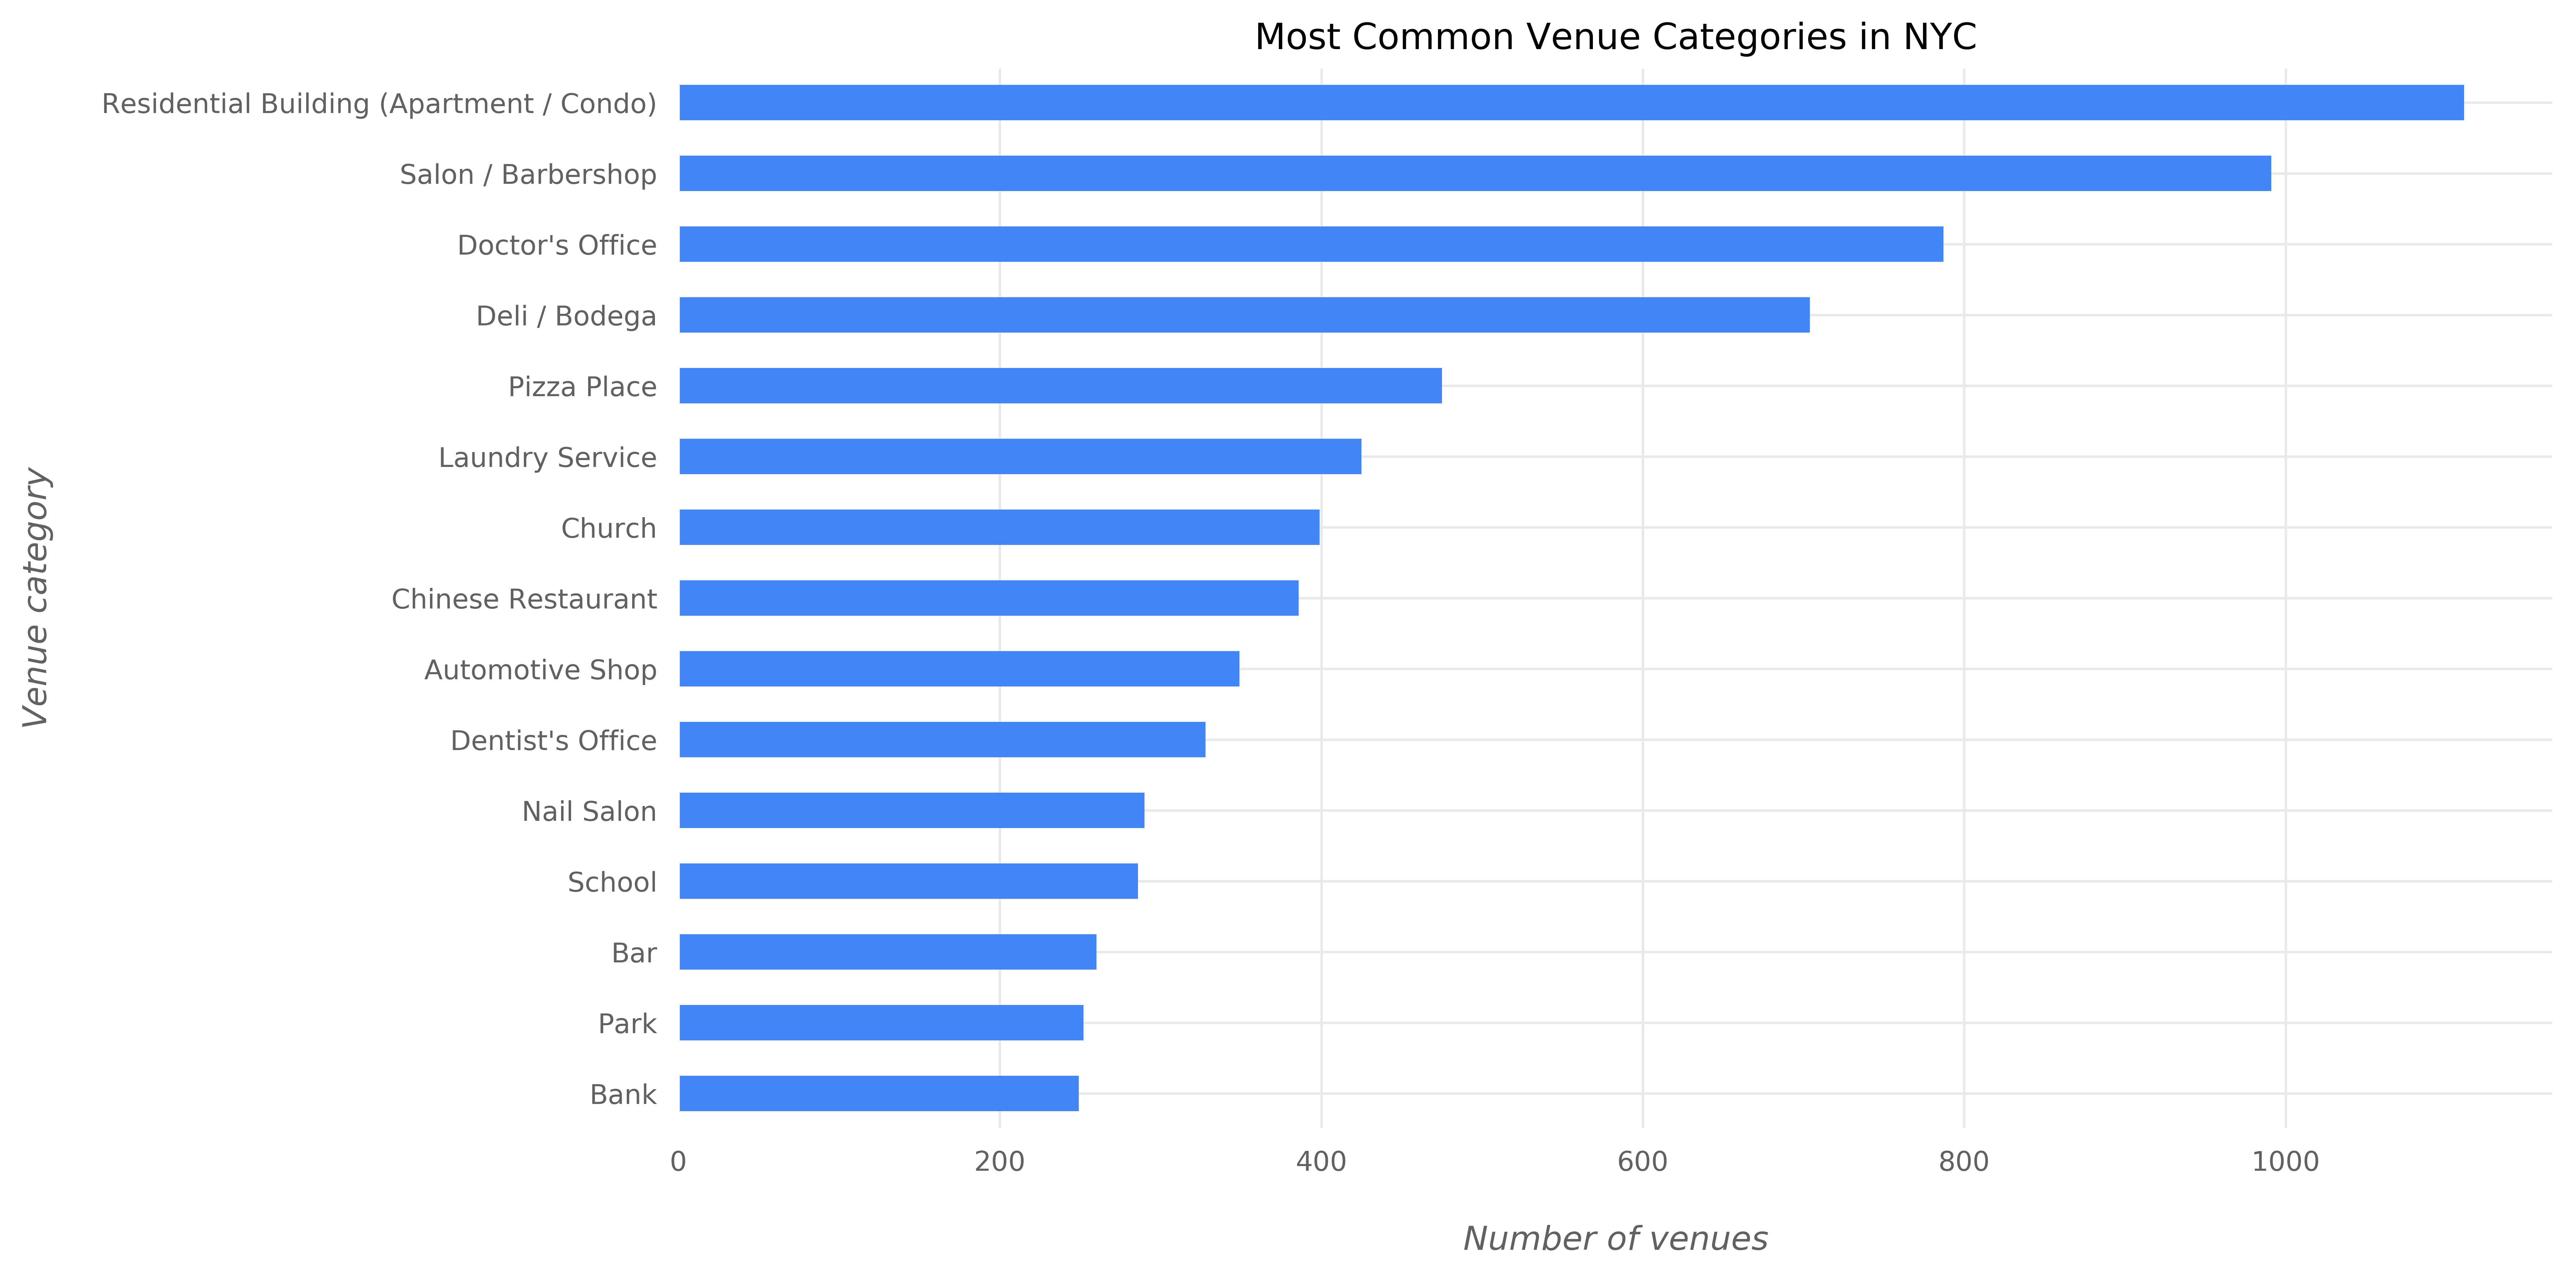

In [81]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_top_vc = nyc_venues['Venue Category'].value_counts(normalize=False)
ax = nyc_top_vc.head(15).plot(kind='barh', color=pc[0]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.title("Most Common Venue Categories in NYC")
plt.tight_layout()

### Most Common Venue Categories in Toronto

Text(0.5, 1.0, 'Most Common Venue Categories in Toronto')

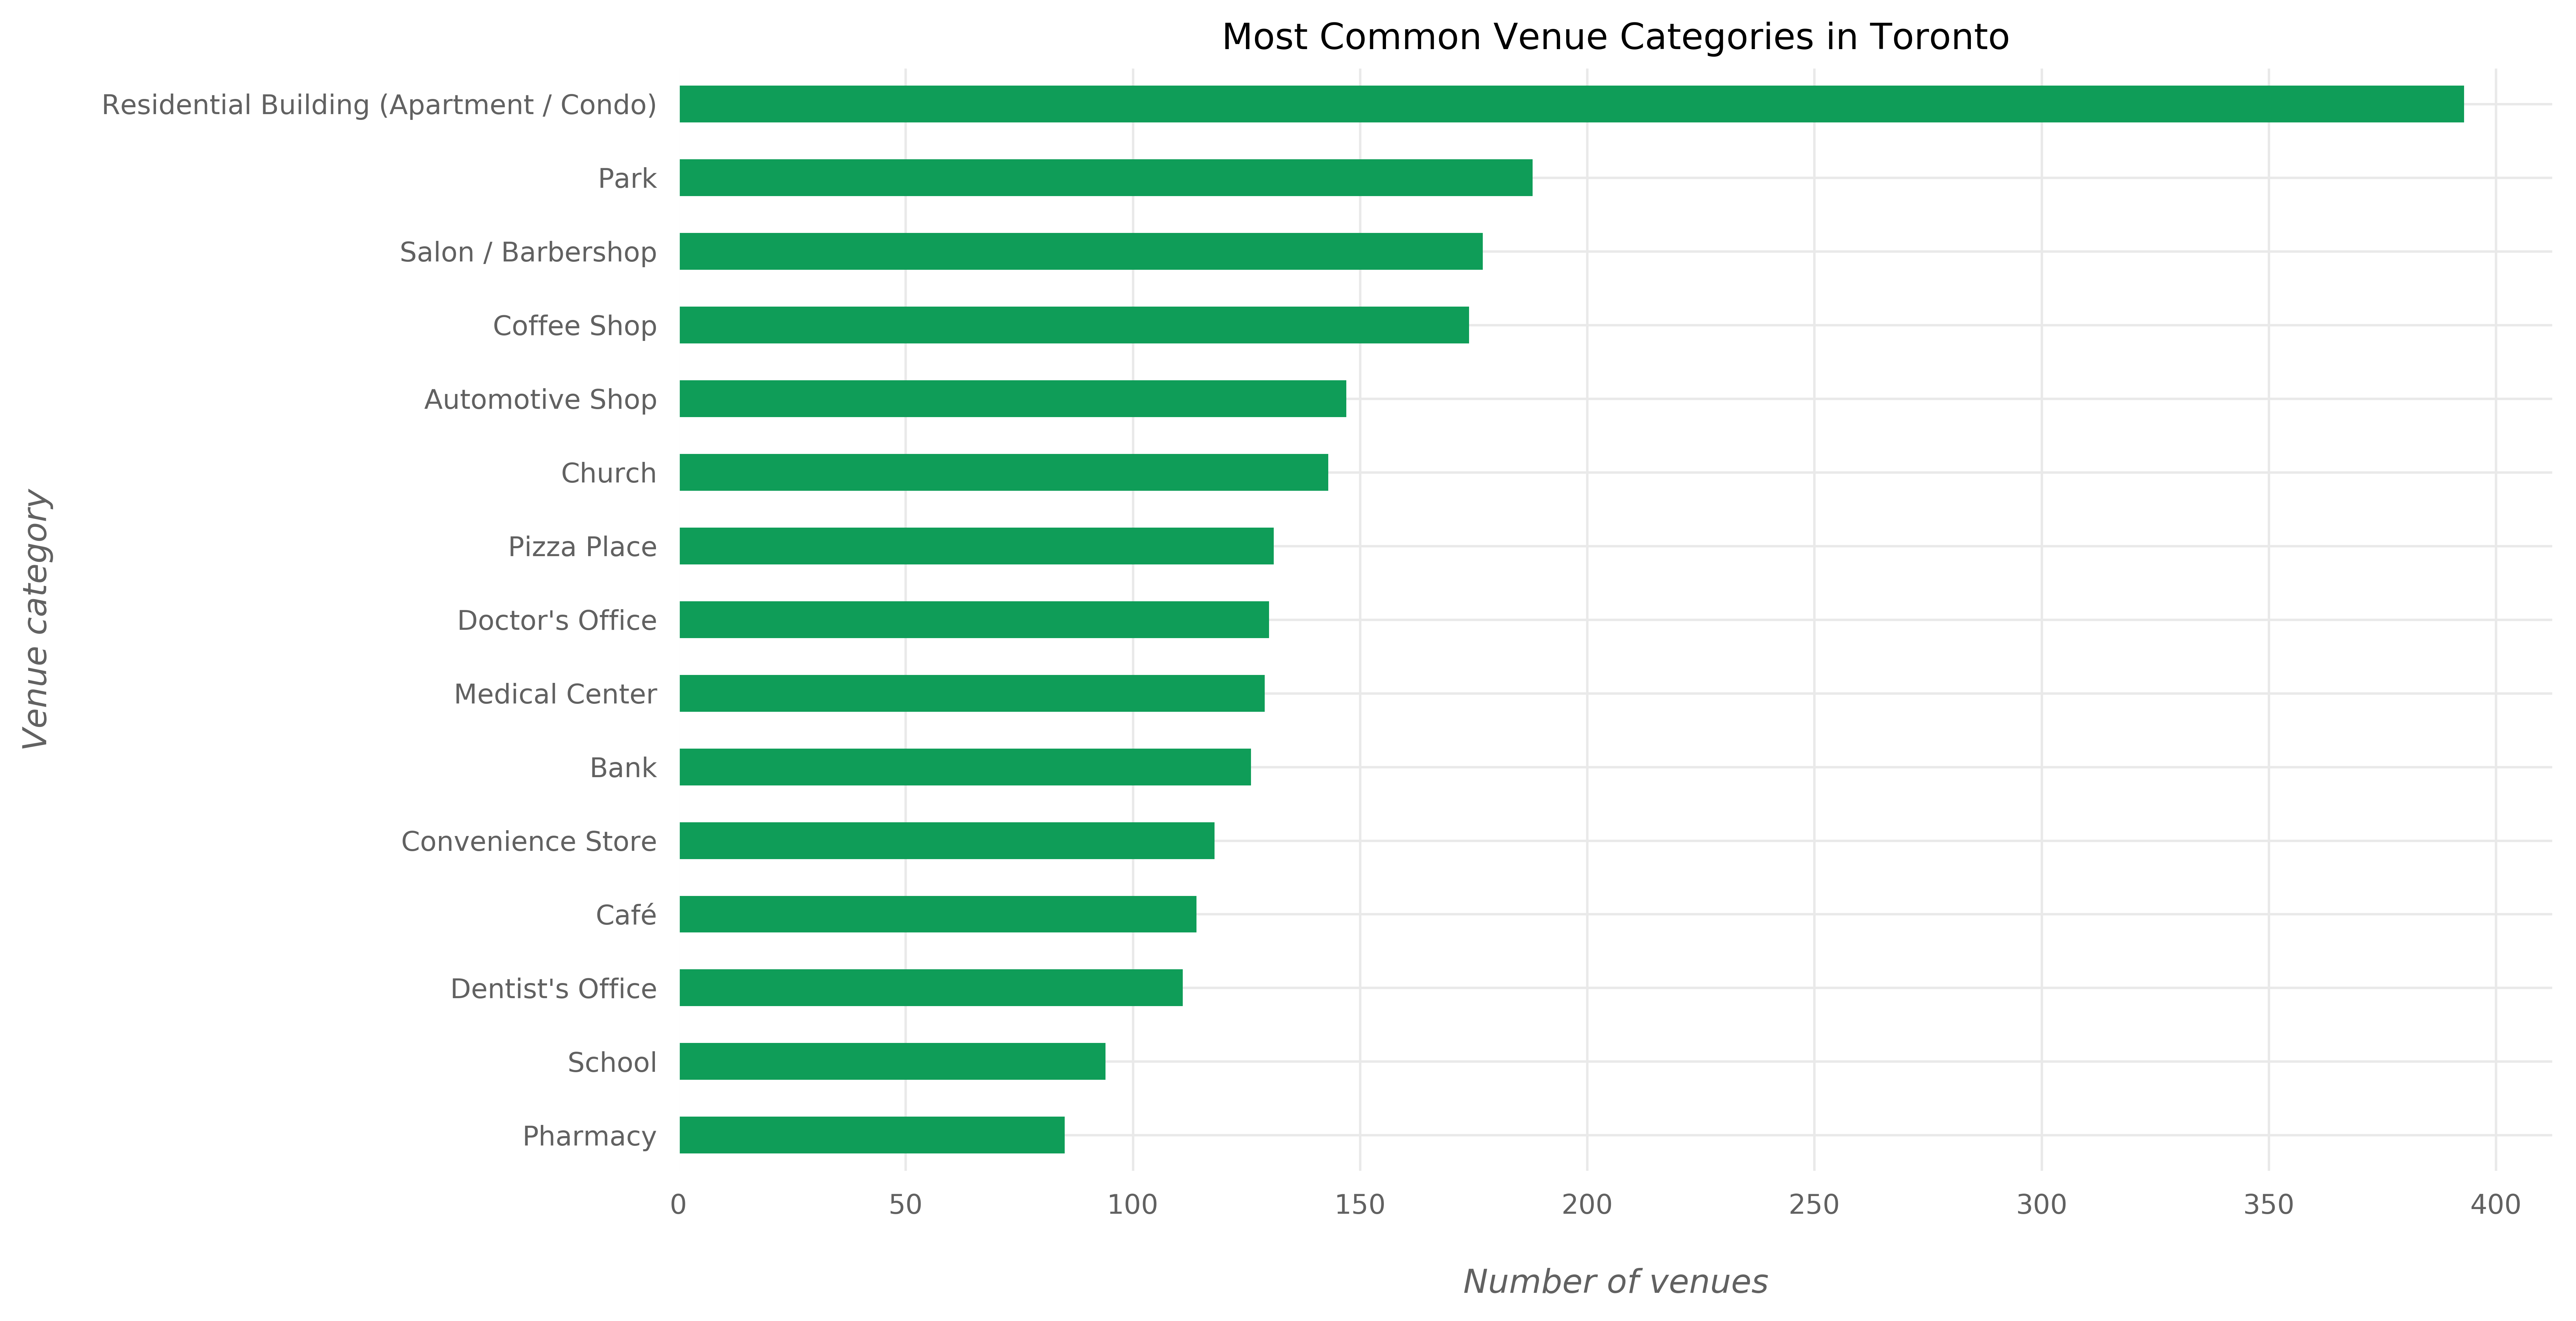

In [82]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_top_vc = tor_venues['Venue Category'].value_counts(normalize=False)
ax = tor_top_vc.head(15).plot(kind='barh', color=pc[3]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
plt.title("Most Common Venue Categories in Toronto")

### Which Venue Categories Exist in More NYC Neighborhoods?

306 neighborhoods in NYC


Text(0.5, 1.0, 'Venue Categories Exist in More NYC Neighborhoods')

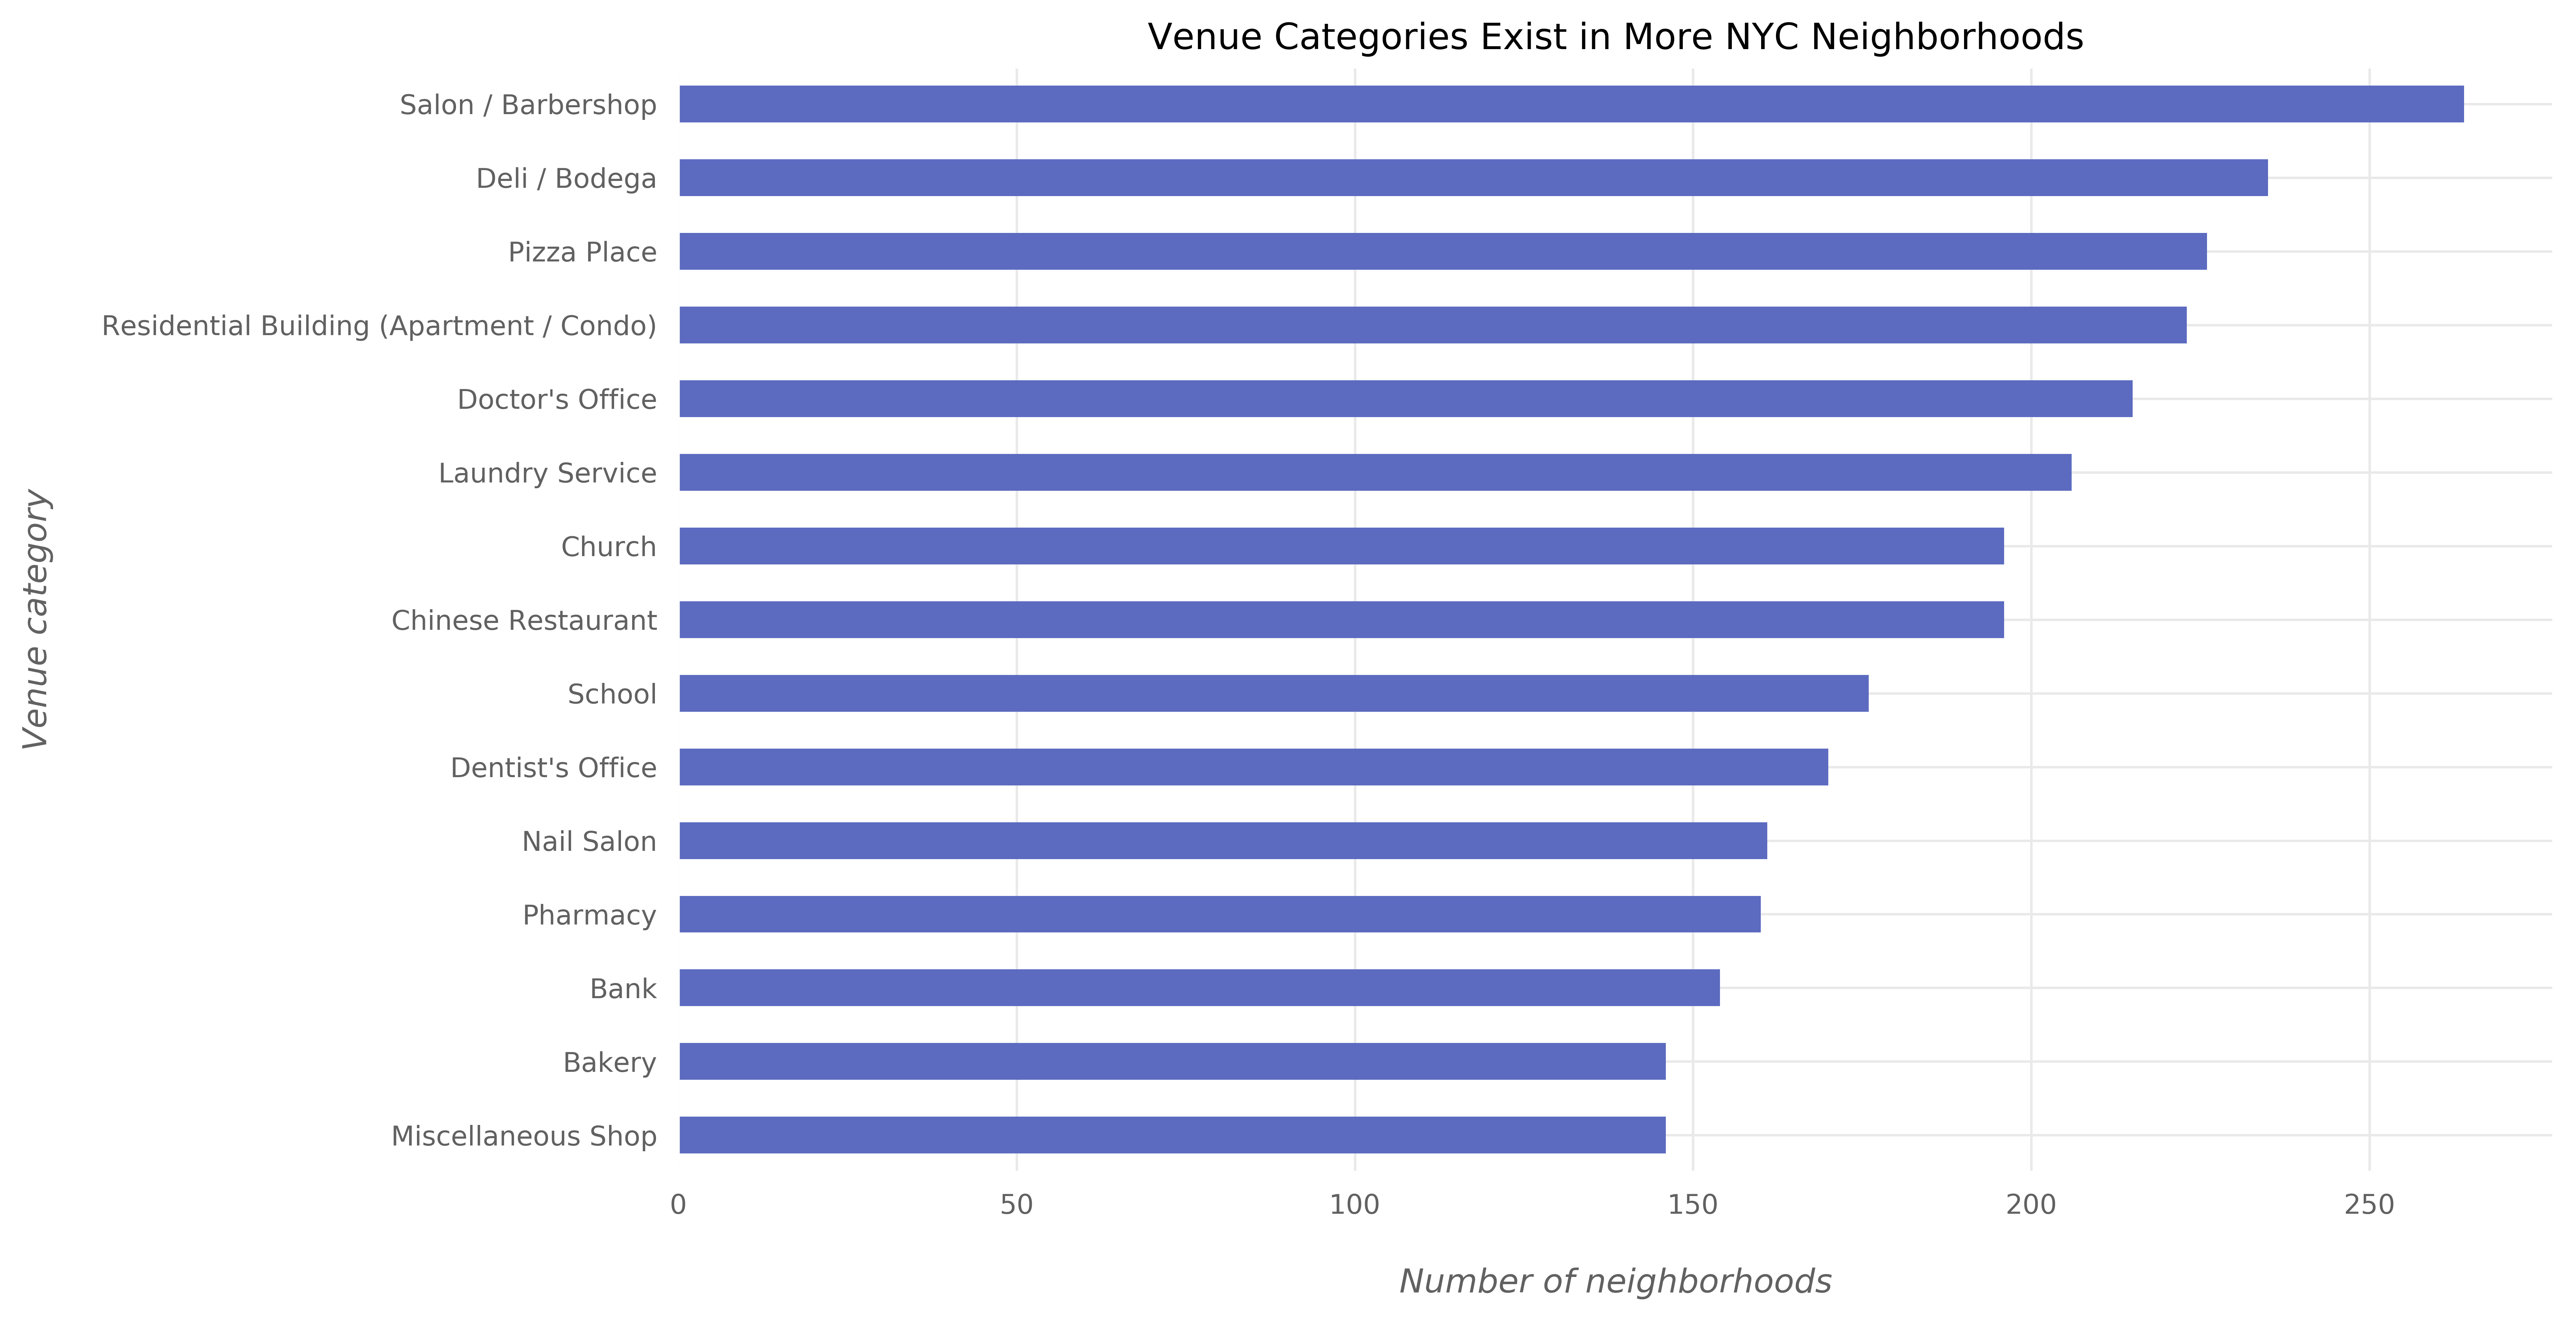

In [83]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_g = nyc_onehot.groupby('Neighborhood_').max().reset_index()
nyc_p = nyc_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in NYC".format(nyc_g.shape[0]))
ax = nyc_p.head(15).plot(kind='barh', color=pc[8]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
plt.title("Venue Categories Exist in More NYC Neighborhoods")

### Which Venue Categories Exist in More Toronto Neighborhoods?

102 neighborhoods in Toronto


Text(0.5, 1.0, 'Venue Categories Exist in More Toronto Neighborhoods')

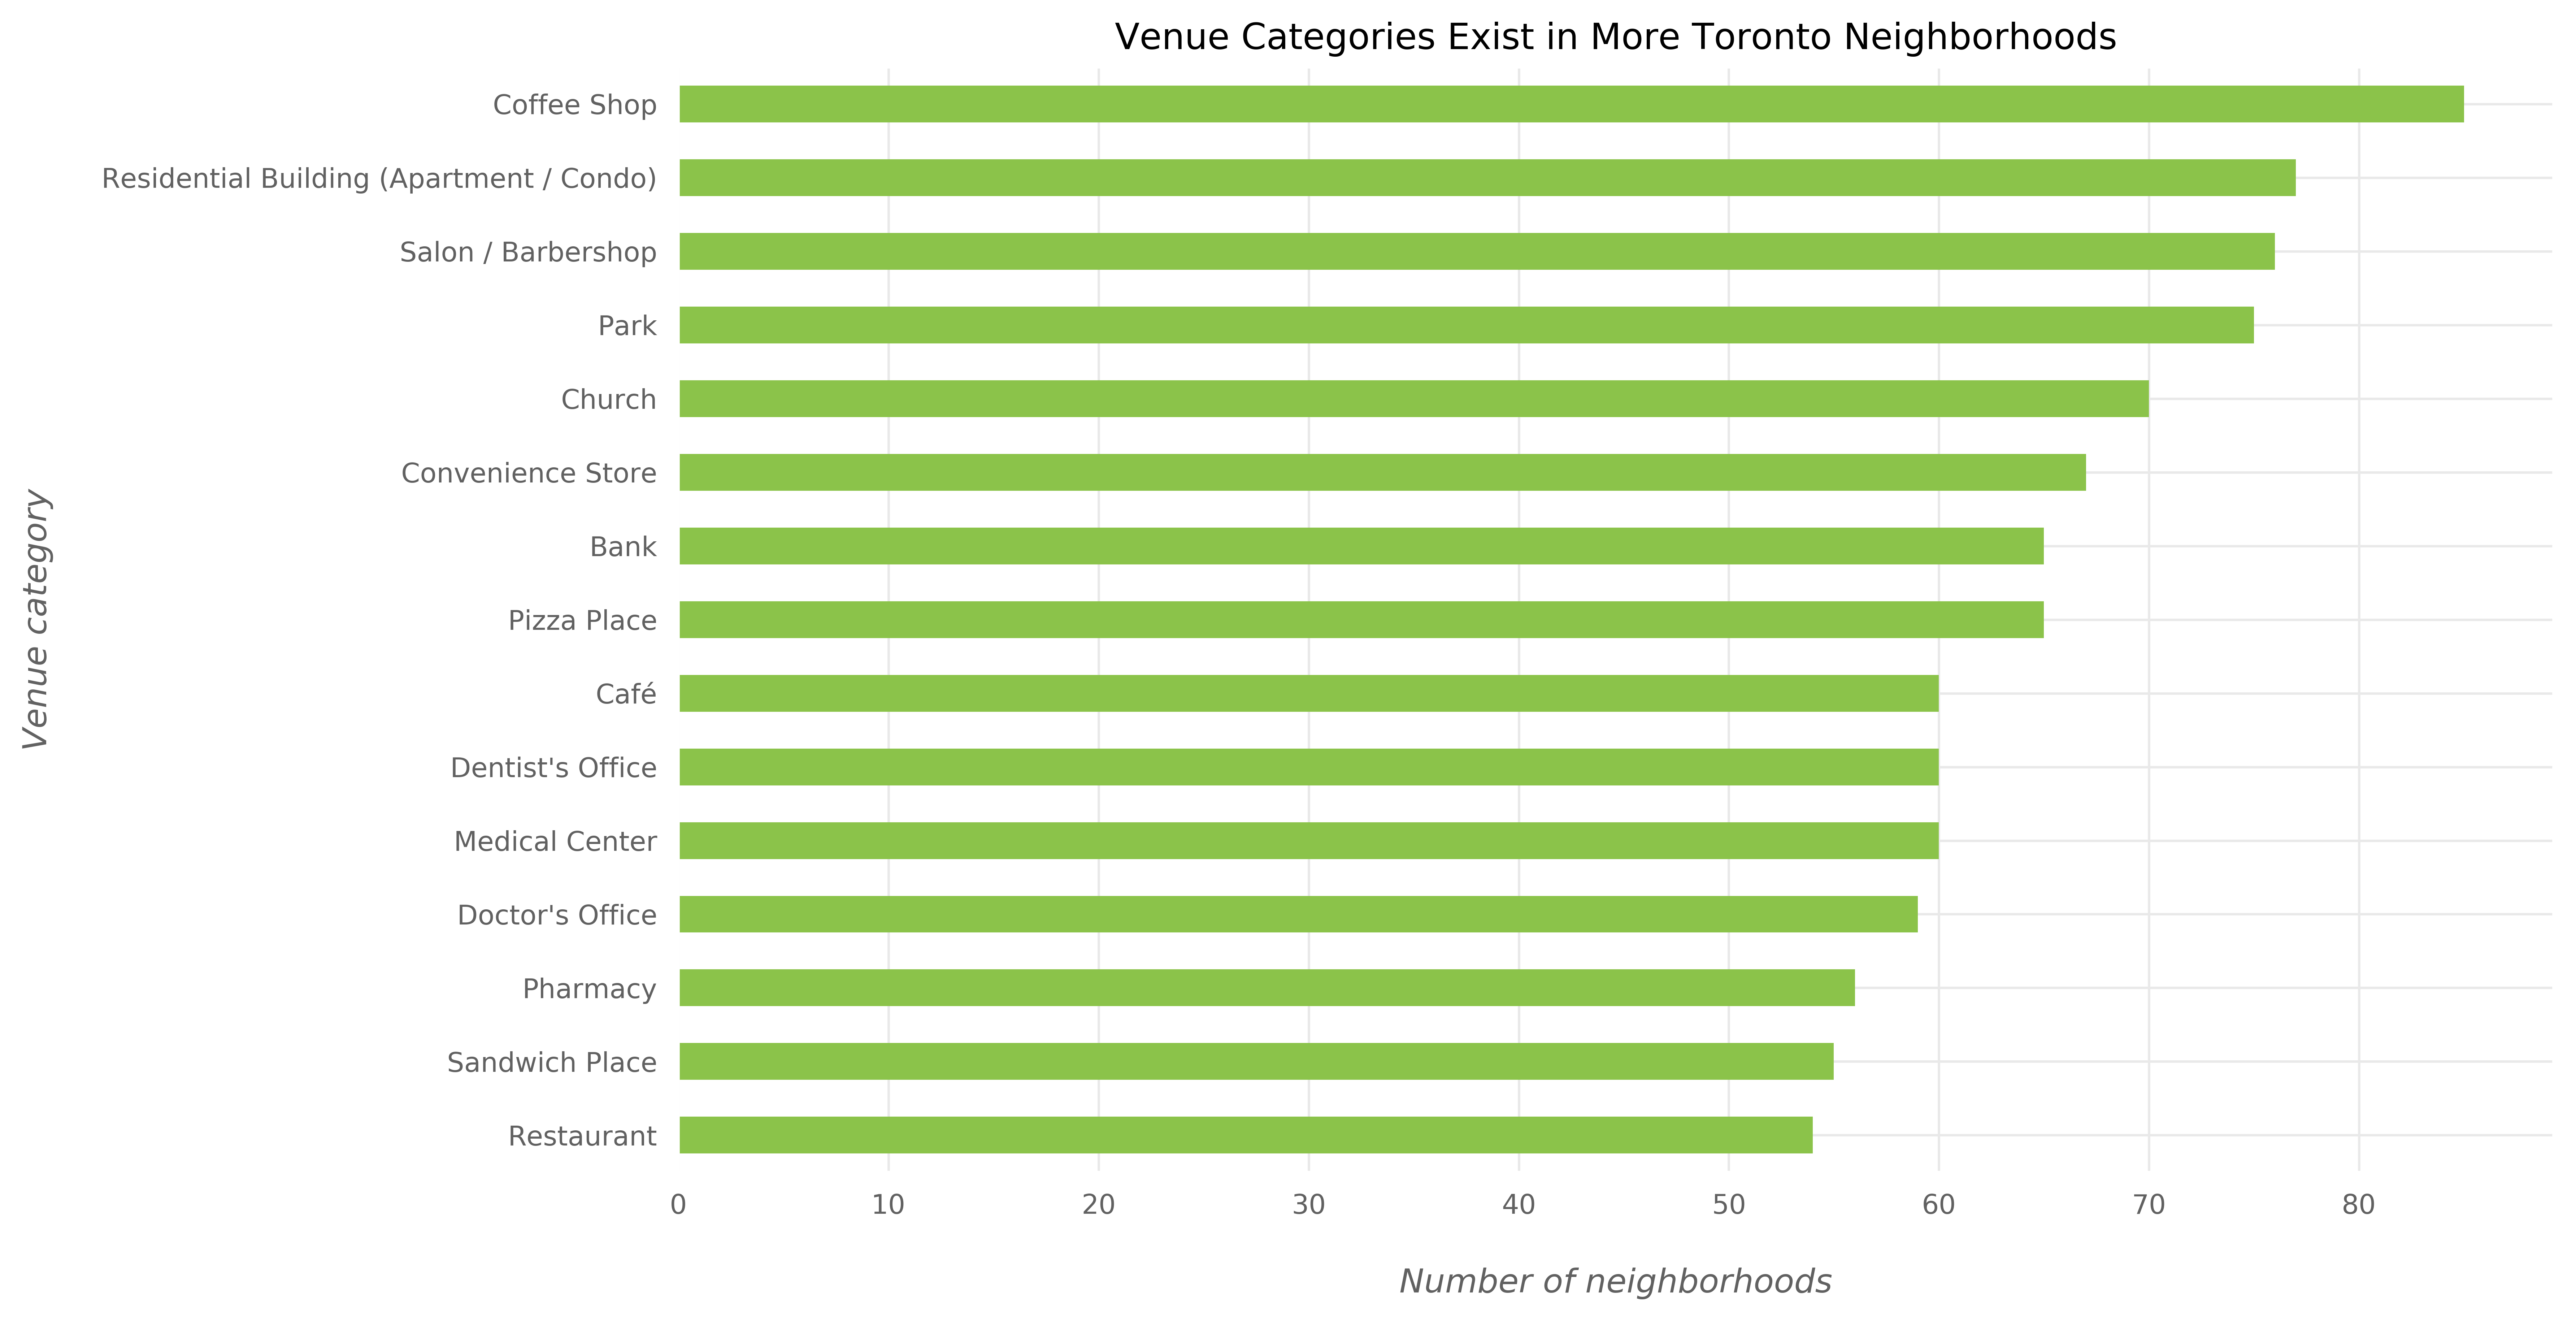

In [84]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
tor_g = tor_onehot.groupby('Neighborhood_').max().reset_index()
tor_p = tor_g.drop('Neighborhood_', axis=1).sum().sort_values(ascending=False)
print("{} neighborhoods in Toronto".format(tor_g.shape[0]))
ax = tor_p.head(15).plot(kind='barh', color=pc[14]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of neighborhoods', ylbl='Venue category', t='')
plt.tight_layout()
plt.title("Venue Categories Exist in More Toronto Neighborhoods")

### Most Common Venue Categories in both NYC and Toronto

In [85]:
clmns_nyc_only = set(nyc_grouped.columns).difference(set(tor_grouped.columns))
clmns_tor_only = set(tor_grouped.columns).difference(set(nyc_grouped.columns))

In [86]:
nyc_grouped_ = nyc_grouped.copy()
nyc_grouped_['Neighborhood_'] = nyc_grouped_['Neighborhood_'].apply(lambda x: x + '_NYC')
tor_grouped_ = tor_grouped.copy()
tor_grouped_['Neighborhood_'] = tor_grouped_['Neighborhood_'].apply(lambda x: x + '_Toronto')

for c in clmns_tor_only:
    nyc_grouped_[c] = 0
for c in clmns_nyc_only:
    tor_grouped_[c] = 0
    
all_clmns_sorted = ['Neighborhood_'] + sorted(list(nyc_grouped_.drop('Neighborhood_', axis=1).columns), key=str.lower)
nyc_grouped_ = nyc_grouped_[all_clmns_sorted]
tor_grouped_ = tor_grouped_[all_clmns_sorted]
    
nyc_tor_grouped = pd.concat([nyc_grouped_, tor_grouped_]).reset_index(drop=True)

In [87]:
nyc_tor_grouped.shape

(408, 623)

In [88]:
# obtaining the most popular categories for each neighborhood
nyc_tor_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
nyc_tor_neighborhoods_categories_sorted['Neighborhood_'] = nyc_tor_grouped['Neighborhood_']

for ind in np.arange(nyc_tor_grouped.shape[0]):
    nyc_tor_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        nyc_tor_grouped.iloc[ind, :], num_top_cat)

nyc_tor_neighborhoods_categories_sorted.head()

Neighborhood_     1st Most Common Category 2nd Most Common Category  \
0       Allerton_NYC              Laundry Service       Salon / Barbershop   
1       Annadale_NYC           Salon / Barbershop              Pizza Place   
2  Arden Heights_NYC  Professional & Other Places                     Pool   
3      Arlington_NYC  Professional & Other Places                   Church   
4       Arrochar_NYC                Deli / Bodega               Food Truck   

                   3rd Most Common Category 4th Most Common Category  \
0                             Deli / Bodega                 Pharmacy   
1                             Tattoo Parlor               Nail Salon   
2                          Dentist's Office          Doctor's Office   
3  Residential Building (Apartment / Condo)           Hardware Store   
4                               Pizza Place          Doctor's Office   

  5th Most Common Category 6th Most Common Category 7th Most Common Category  
0                     Food              Gas Station              Pizza Place  
1      American Restaurant                  Butcher              Gas Station  
2            Moving Target                      Gym               Playground  
3       Salon / Barbershop           Scenic Lookout               Playground  
4       Italian Restaurant              Dry Cleaner                    Beach

### Most Common Venue Categories in both NYC and Toronto

Text(0.5, 1.0, 'Most Common Venue Categories in both NYC and Toronto')

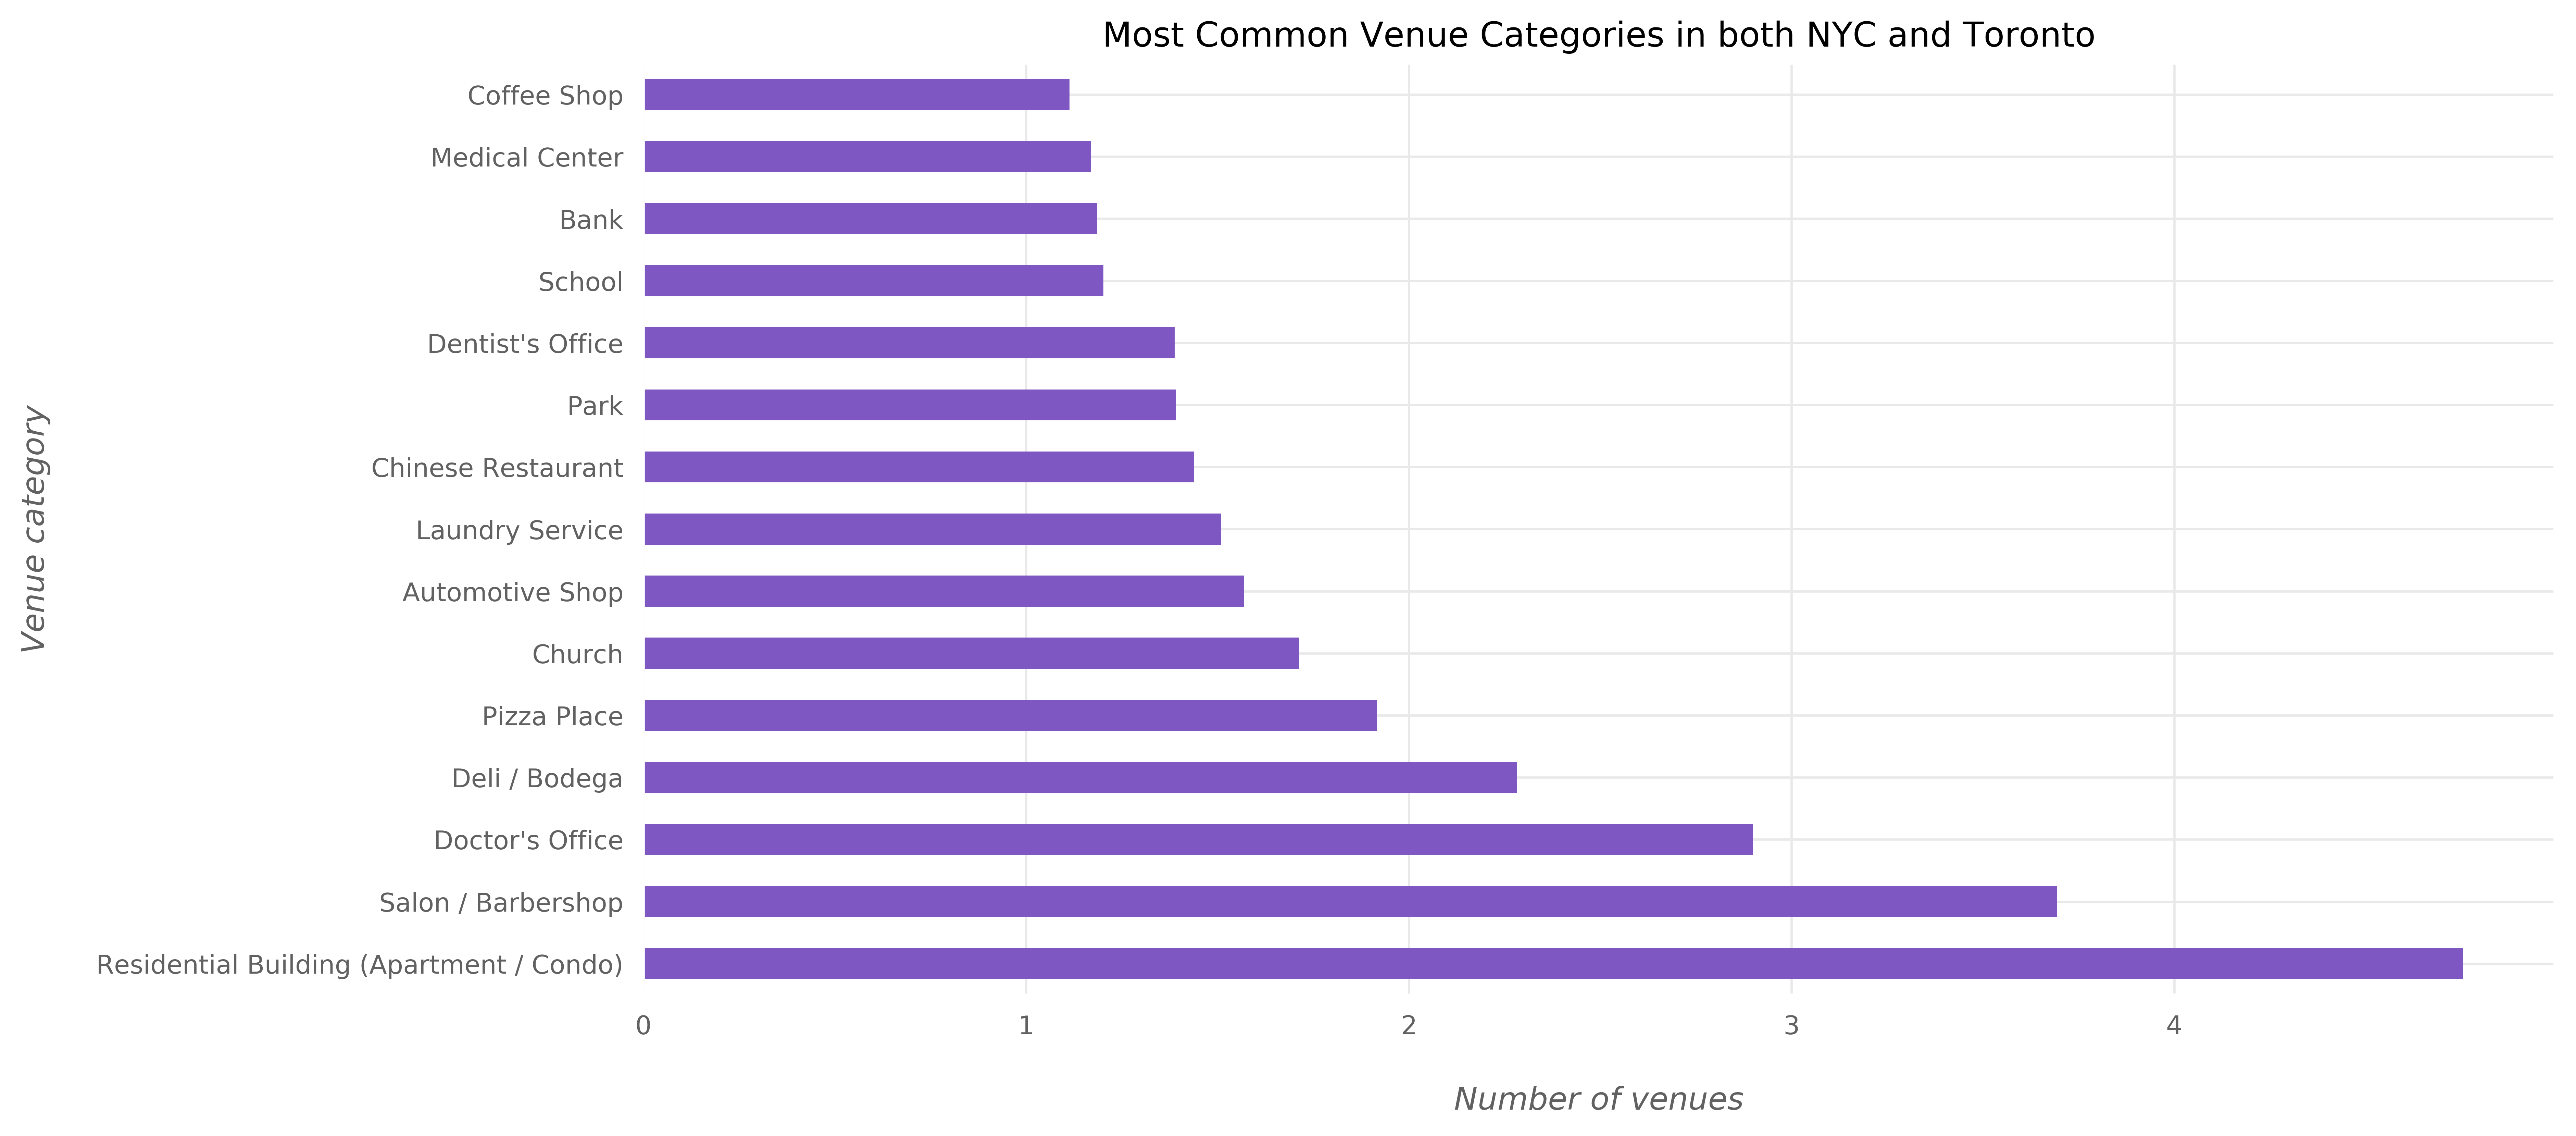

In [89]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
nyc_tor_top_vc = pd.concat([nyc_venues, tor_venues])['Venue Category'].value_counts(normalize=True) * 100
ax = nyc_tor_top_vc.head(15).plot(kind='barh', color=pc[12]);
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.title("Most Common Venue Categories in both NYC and Toronto")